<a id='ds0'></a>
#  <div class="h1">  DS4G: Environmental Insights Explorer 🌏</div>
### Exploring alternatives for emissions factor calculations
    
    

[🌏🌿Green Future: Analysis and Solution](https://www.kaggle.com/caesarlupum/green-future-analysis-and-solution/)

<div class="h3"> Submissions: </div>

Following are parts of Kernels Submissions in order:
<ul>
    <li>
        <a href="https://www.kaggle.com/caesarlupum/ds4g-go-to-the-green-future" target="_blank">Part 1: 🌏🌿DS4G: Go to the Green Future! - A Gentle Introduction </a>  
    </li>
    <li>
        <a href="https://www.kaggle.com/maxlenormand/saving-the-power-plants-csv-to-geojson" target="_blank">Part 2: Saving the Power Plants CSV to GeoJSON - EDA Analysis - Tutorial, analytics </a>  
    </li>
    <li>
        <a href="https://www.kaggle.com/caesarlupum/ds4g-anomaly-analysis" target="_blank">Part 3: 🌏🌿Green Future: Anomaly Analysis & Time Series - A Deep Analysis </a>  
    </li>

</ul>

<div align='center'><font size="5" color="#00b899">🌏🌿Green Future: Anomaly Analysis & Time Series</font></div>
<div align='center'>Other Parts: <a href='https://www.kaggle.com/caesarlupum/ds4g-go-to-the-green-future'>Part 1</a> | <a href='https://www.kaggle.com/maxlenormand/saving-the-power-plants-csv-to-geojson'>Part 2</a> | <a href='https://www.kaggle.com/caesarlupum/ds4g-anomaly-analysis'>Part 3</a>  

</div>

<a class="anchor" id="top"></a>
<a id='dsf4'></a>
# <div class="h2">  Table of contents</div>

1. [Glimpse of Data](#PREPARATION)
    * [Import packages](#IMPORT)
2. [Reading S5p data Whether and No2](#READS5P)
3. [Visuals](#V1)
4. [Anomaly Analysis](#OUTLIER)
    4.1 [Gaussian](#OUTLIER1)
    4.2 [Isolation Forest](#OUTLIER2)
    4.3 [One Class SVM](#OUTLIER3)

5. [Prediction using LSTM with Python](#LSTM1)
    5.1 [Get the root mean squared error (RMSE)](#LSTM1)

6. [Arima with Python](#AR)
    6.1. [Rolling Forecast ARIMA Model](#AR2)

7. [Time series prediction using Prophet in Python](#PRO)
    7.1. [Forecast quality evaluation](#PRO1)
    7.2. [Incorporating the Effects of Weather Condition](#PRO2)
    7.3. [Forecast quality evaluation](#PRO3)
    7.4. [Save The Model](#PRO4)
8. [Prediction of  NO2 density for each primary_fuel throughout the year](#M1)
    8.1. [Forecast quality evaluation for Power Plant over the year](#M2)
    8.3. [Outlier Analysis of Power Plant - Coal over the year](#M3)
       
9. [About the data](#ABOUTDATA)  
10. [Ending note](#END)  

  <hr>

## In this notebook we investigated the presence of NO2 concentration in air, considering its constant increase over days, years. Owing to accurate future air quality estimates, the need for detecting the anomalously high increase in the concentration of pollutants cannot be adjourned. This study is helpful in educating the government for decision making and people about spatiotemporal, geographical, and economic conditions responsible for anomalously high NO2 concentrations in air. In this work, we modeling the solution and analyze the impacts of air pollution for each region in Porto Rico for each primary_fuel in the year.

<div class="h2"> Glimpse of Data - Power Plants </div>
<a id="PREPARATION"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)
  

# <div class="h3">Imports </div>
<a id="IMPORT"></a>
[Back to Table of Contents](#top)

We are using a stack: ``numpy``, ``pandas``, ``sklearn``, ``matplotlib``, ``rasterio``, ``plotly``.

In [1]:
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns', 200)

In [2]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn import preprocessing

In [3]:
# !pip install plotly
# !pip install fbprophet

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

import datetime as dt
from statsmodels.tsa.arima_model import ARIMA

from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import plotly.offline as py
from matplotlib import pyplot
py.init_notebook_mode()


Using TensorFlow backend.


In [5]:
%%HTML
<style type="text/css">
div.h1 {
    background-color: #00b899; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 35px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 50px;
}

div.h2 {
    background-color: #00b899; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 25px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 50px;
}
div.h3 {
    color: #00b899;
    font-size: 16px; 
    margin-top: 20px; 
    margin-bottom:4px;
}
div.h4 {
    font-size: 15px; 
    margin-top: 20px; 
    margin-bottom: 8px;
}
span.note {
    font-size: 5; 
    color: gray; 
    font-style: italic;
}
span.captiona {
    font-size: 5; 
    color: dimgray; 
    font-style: italic;
    margin-left: 130px;
    vertical-align: top;
}
hr {
    display: block; 
    color: gray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}
hr.light {
    display: block; 
    color: lightgray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}

</style>

<div class="h1"> Reading S5p data Whether and No2 </div>
<a id="READS5P"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)
  
You can verify the data with more details here: [Prepare Data for Modeling](https://www.kaggle.com/caesarlupum/ds4g-go-to-the-green-future#-Satellite-Information)

In [6]:
import pandas as pd
no2_weather = pd.read_csv("../input/s5p-data-csv/no2_weather.csv")
s5p_no2_pictures_df = pd.read_csv("../input/s5p-data-csv/s5p_no2_pictures_df.csv")
weather_pictures_df = pd.read_csv("../input/s5p-data-csv/weather_pictures_df.csv")

In [7]:
import rasterio as rio
def split_column_into_new_columns(dataframe,column_to_split,new_column_one,begin_column_one,end_column_one):
    for i in range(0, len(dataframe)):
        dataframe.loc[i, new_column_one] = dataframe.loc[i, column_to_split][begin_column_one:end_column_one]
    return dataframe

Power plants on Puerto Rico

In [8]:
power_plants = pd.read_csv('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv')
power_plants = split_column_into_new_columns(power_plants,'.geo','latitude',50,66)
power_plants = split_column_into_new_columns(power_plants,'.geo','longitude',31,48)
power_plants['latitude'] = power_plants['latitude'].astype(float)
a = np.array(power_plants['latitude'].values.tolist()) # 18 instead of 8
power_plants['latitude'] = np.where(a < 10, a+10, a).tolist() 

power_plants_df = power_plants.sort_values('capacity_mw',ascending=False).reset_index()
power_plants_df['img_idx_lt']=(((18.6-power_plants_df.latitude)*148/(18.6-17.9))).astype(int)
power_plants_df['img_idx_lg']=((67.3+power_plants_df.longitude.astype(float))*475/(67.3-65.2)).astype(int)
power_plants_df['plant']=power_plants_df.name.str[:3]+power_plants_df.name.str[-1]+'_'+power_plants_df.primary_fuel
power_plants=power_plants_df[['name','latitude','longitude','primary_fuel','capacity_mw','img_idx_lt','img_idx_lg','plant']]
power_plants

name   latitude          longitude primary_fuel  \
0                  Aguirre  17.951899  -66.2307960735768          Oil   
1                Costa Sur  18.000298  -66.7534027170407          Oil   
2              San Juan CC  18.426999  -66.1045009544401          Oil   
3                Palo Seco  18.455301  -66.1485970047576          Oil   
4             EcoEléctrica  17.981200  -66.7552041938662          Gas   
5             A.E.S. Corp.  17.947400  -66.1493996429472         Coal   
6               Cambalache  18.469102  -66.6967988882682          Oil   
7                 Mayagüez  18.219401  -67.1600058465991          Gas   
8                Palo Seco  18.455100  -66.1498009620420          Gas   
9   Santa Isabel Wind Farm  17.985298  -66.3980034448789         Wind   
10       Oriana Solar Farm  18.472901  -67.0442966333633        Solar   
11                 Yabucoa  18.106398  -65.8248974819848          Gas   
12                  Daguao  18.232502  -65.6677007925477          Gas   
13                 Aguirre  17.953300  -66.2312018517727          Gas   
14                   Jobos  17.961500  -66.1401960583729          Gas   
15               Vega Baja  18.445803  -66.3914039753198          Gas   
16               Costa Sur  18.001801  -66.7537014768112          Gas   
17   San Fermin Solar Farm  18.405501  -65.9076985294462        Solar   
18        Loiza Solar Park  18.413399  -65.9028024364895        Solar   
19                 Yauco 1  18.110599  -66.8711006893464        Hydro   
20             AES Ilumina  17.946798  -66.1591026468395        Solar   
21              Punta Lima  18.186800  -65.6948032087505         Wind   
22             Caonillas 1  18.296102  -66.6432049527069        Hydro   
23                 Salinas  17.978600  -66.2204955501434        Solar   
24               Dos Bocas  18.335899  -66.6662986370627        Hydro   
25                Carite 1  18.044702  -66.1060036714951        Hydro   
26                 Yauco 2  18.053598  -66.8836976498224        Hydro   
27            Toro Negro 1  18.131802  -66.4878989221164        Hydro   
28                Garzas 1  18.094100  -66.7345942287972        Hydro   
29             Vieques EPP  18.142901  -65.4440010699994          Oil   
30                Garzas 2  18.072701  -66.7305007740302        Hydro   
31              Río Blanco  18.243600  -65.7852025644070        Hydro   
32           Windmar Ponce  18.062298  -66.5484981054327        Solar   
33             Caonillas 2  18.239699  -66.6690989525242        Hydro   
34            Toro Negro 2  18.166400  -66.5115945851144        Hydro   

    capacity_mw  img_idx_lt  img_idx_lg       plant  
0   1492.000000         137         241    Ague_Oil  
1    990.000000         126         123    Cosr_Oil  
2    864.000000          36         270    SanC_Oil  
3    602.000000          30         260    Palo_Oil  
4    507.000000         130         123    Ecoa_Gas  
5    454.299988         137         260   A.E._Coal  
6    247.500000          27         136    Came_Oil  
7    220.000000          80          31    Mayz_Gas  
8    126.000000          30         260    Palo_Gas  
9    101.199997         129         204   Sanm_Wind  
10    57.650002          26          57  Orim_Solar  
11    42.000000         104         333    Yaba_Gas  
12    42.000000          77         369    Dago_Gas  
13    42.000000         136         241    Ague_Gas  
14    42.000000         134         262    Jobs_Gas  
15    42.000000          32         205    Vega_Gas  
16    42.000000         126         123    Cosr_Gas  
17    27.000000          41         314  Sanm_Solar  
18    26.000000          39         316  Loik_Solar  
19    25.000000         103          97  Yau1_Hydro  
20    24.000000         138         258  AESa_Solar  
21    23.400000          87         363   Puna_Wind  
22    18.000000          64         148  Cao1_Hydro  
23    15.500000         131         244  Sals_Solar  
24    15.000000          55         143  Do

<div class="h3"> shape and head no2 weather </div>
<a id="P"></a>
  

In [9]:
no2_weather.shape

(387, 9)

In [10]:
no2_weather.head()

start_date  no2_emission_sum        date  temperature_2m_above_ground_mean  \
0  2018-07-01         18.923768  2018-07-01                         26.698238   
1  2018-07-02         18.560087  2018-07-02                         26.502170   
2  2018-07-04         16.176976  2018-07-04                         26.892851   
3  2018-07-05         16.301243  2018-07-05                         26.783559   
4  2018-07-06               NaN  2018-07-06                         26.768654   

   specific_humidity_2m_above_ground_mean  \
0                                0.016360   
1                                0.017176   
2                                0.016908   
3                                0.016893   
4                                0.016544   

   relative_humidity_2m_above_ground_mean  \
0                               75.190846   
1                               79.500569   
2                               76.759937   
3                               77.301614   
4                               75.760273   

   u_component_of_wind_10m_above_ground_mean  \
0                                  -3.427650   
1                                  -3.063298   
2                                  -4.791763   
3                                  -4.255460   
4                                  -4.269123   

   v_component_of_wind_10m_above_ground_mean  total_precipitation_surface_mean  
0                                  -1.093313                         31.623991  
1                                  -0.446986                         34.462254  
2                                  -0.492622                         36.685696  
3                                  -1.008936                         35.369304  
4                                  -0.749186                         37.137468

<div class="h3"> shape and head s5p  </div>
<a id="P"></a>
  

In [11]:
s5p_no2_pictures_df.shape

(387, 8)

In [12]:
s5p_no2_pictures_df.head()

start_date    end_date                                               data  \
0  2018-07-01  2018-07-07  [[[5.70084930e-05 1.39528742e-05 4.30556187e-0...   
1  2018-07-02  2018-07-08  [[[4.92035599e-05 4.22176239e-06 4.49817960e-0...   
2  2018-07-04  2018-07-10  [[[4.87563193e-05 1.00307045e-06 4.77532485e-0...   
3  2018-07-05  2018-07-12  [[[5.43060783e-05 8.88749165e-06 4.54185862e-0...   
4  2018-07-06  2018-07-12  [[[5.74876722e-05 1.38757114e-05 4.36119590e-0...   

   no2_emission_sum  no2_emission_mean  no2_emission_std  no2_emission_max  \
0         18.923768           0.000067          0.000053          0.000196   
1         18.560087           0.000066          0.000053          0.000186   
2         16.176976           0.000058          0.000037          0.000141   
3         16.301243           0.000058          0.000039          0.000180   
4               NaN                NaN               NaN               NaN   

   no2_emission_min  
0     -4.054218e-07  
1     -2.843851e-06  
2     -3.731904e-06  
3     -8.590432e-06  
4               NaN

<div class="h3"> shape and head weather  </div>
<a id="P"></a>
  

In [13]:
weather_pictures_df.shape

(365, 7)

In [14]:
weather_pictures_df.head()

date  temperature_2m_above_ground_mean  \
0  2018-07-01                         26.698238   
1  2018-07-02                         26.502170   
2  2018-07-03                         27.057593   
3  2018-07-04                         26.892851   
4  2018-07-05                         26.783559   

   specific_humidity_2m_above_ground_mean  \
0                                0.016360   
1                                0.017176   
2                                0.017078   
3                                0.016908   
4                                0.016893   

   relative_humidity_2m_above_ground_mean  \
0                               75.190846   
1                               79.500569   
2                               77.228895   
3                               76.759937   
4                               77.301614   

   u_component_of_wind_10m_above_ground_mean  \
0                                  -3.427650   
1                                  -3.063298   
2                                  -4.057486   
3                                  -4.791763   
4                                  -4.255460   

   v_component_of_wind_10m_above_ground_mean  total_precipitation_surface_mean  
0                                  -1.093313                         31.623991  
1                                  -0.446986                         34.462254  
2                                   0.551188                         36.508660  
3                                  -0.492622                         36.685696  
4                                  -1.008936                         35.369304

<div class="h2"> Visuals  </div>
<a id="V1"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

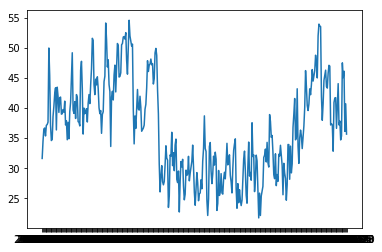

In [15]:
x = weather_pictures_df['date']
y = weather_pictures_df["total_precipitation_surface_mean"]
plt.plot(x,y)
plt.show()

In [16]:
def parser(x):
    return dt.datetime.strptime(x, "%Y-%m-%d")

path= '../input/s5p-data-csv/no2_weather.csv' 
data = pd.read_csv(path, header=0, parse_dates=[0], squeeze=True, date_parser=parser)
data = data[['start_date','no2_emission_sum']]
data["start_date"] = data["start_date"].dt.strftime('%Y%m%d').astype(float)

<div class="h3"> data info  </div>
<a id="DF"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
start_date          387 non-null float64
no2_emission_sum    129 non-null float64
dtypes: float64(2)
memory usage: 6.2 KB


<div class="h3"> drop nan values  </div>
<a id="P"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [18]:
data.dropna(axis=0, inplace=True)
print(data.shape)

(129, 2)


In [19]:
data = data.set_index('start_date')
data.head()

no2_emission_sum
start_date                  
20180701.0         18.923768
20180702.0         18.560087
20180704.0         16.176976
20180705.0         16.301243
20180707.0         20.520065

In [20]:
weather_pictures_df.head(2)

date  temperature_2m_above_ground_mean  \
0  2018-07-01                         26.698238   
1  2018-07-02                         26.502170   

   specific_humidity_2m_above_ground_mean  \
0                                0.016360   
1                                0.017176   

   relative_humidity_2m_above_ground_mean  \
0                               75.190846   
1                               79.500569   

   u_component_of_wind_10m_above_ground_mean  \
0                                  -3.427650   
1                                  -3.063298   

   v_component_of_wind_10m_above_ground_mean  total_precipitation_surface_mean  
0                                  -1.093313                         31.623991  
1                                  -0.446986                         34.462254

In [21]:
weather_pictures_df.shape

(365, 7)

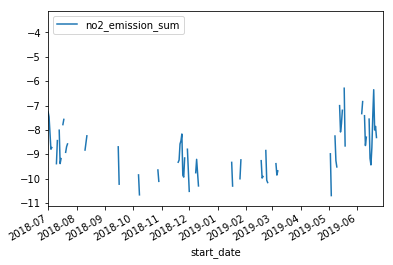

In [22]:
no2_weather['start_date'] = pd.to_datetime(no2_weather['start_date'])
no2_weather['no2_emission_sum'] = (no2_weather['no2_emission_sum'] - 32) * 5/9
# plot the data
no2_weather.plot(x='start_date', y='no2_emission_sum')

<div class="h1">Anomaly Analysis</div>

<a id="OUTLIER"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

Owing to accurate future air quality estimates, need for detecting the anomalously high increase in concentration of pollutants cannot be adjourned. The presence of NO2 concentration in air is investigated in this notebook, considering its constant increase over years as well as its inevitable health risks. Furthermore, spatiotemporal segments with anomalously high NO2 concentrations for  Porto Rico.


In [23]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/8DfXJUDjx64" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Anomaly Detection | Developing And Evaluating An Anomaly Detection System

<div class="h3">Feature engineering</div>
Extracting some features


In [24]:
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01

no2_weather['day'] = no2_weather['start_date'].dt.day
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
no2_weather['DayOfTheWeek'] = no2_weather['start_date'].dt.dayofweek

<div class="h3">creation of 6 distinct categories emissions</div>


In [25]:
# creation of 6 distinct categories that seem useful (week end/day)
no2_weather['catDayEmission'] = no2_weather['DayOfTheWeek']

a = no2_weather.loc[no2_weather['catDayEmission'] == 0, 'no2_emission_sum']
b = no2_weather.loc[no2_weather['catDayEmission'] == 1, 'no2_emission_sum']
c = no2_weather.loc[no2_weather['catDayEmission'] == 2, 'no2_emission_sum']
d = no2_weather.loc[no2_weather['catDayEmission'] == 3, 'no2_emission_sum']
e = no2_weather.loc[no2_weather['catDayEmission'] == 4, 'no2_emission_sum']
f = no2_weather.loc[no2_weather['catDayEmission'] == 5, 'no2_emission_sum']
g = no2_weather.loc[no2_weather['catDayEmission'] == 6, 'no2_emission_sum']



In [26]:
# creation of 6 distinct categories that seem useful (week end/day)
no2_weather['catDayEPrecSurfaceMean'] = no2_weather['DayOfTheWeek']

a2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 0, 'total_precipitation_surface_mean']
b2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 1, 'total_precipitation_surface_mean']
c2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 2, 'total_precipitation_surface_mean']
d2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 3, 'total_precipitation_surface_mean']
e2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 4, 'total_precipitation_surface_mean']
f2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 5, 'total_precipitation_surface_mean']
g2 = no2_weather.loc[no2_weather['catDayEPrecSurfaceMean'] == 6, 'total_precipitation_surface_mean']

Create features for analysing **no2_emission_sum**, **total_precipitation_surface_mean** for each **day of week**

<div class="h3">time with int to plot easily</div>


In [27]:
no2_weather['time_epoch'] = (no2_weather['start_date'].astype(np.int64)/100000000000).astype(np.int64)

In [28]:
# Take useful feature and standardize them
data_IF = no2_weather[['time_epoch','DayOfTheWeek','day','no2_emission_sum','temperature_2m_above_ground_mean','specific_humidity_2m_above_ground_mean','relative_humidity_2m_above_ground_mean','u_component_of_wind_10m_above_ground_mean','v_component_of_wind_10m_above_ground_mean','total_precipitation_surface_mean']]

data_IF.dropna(axis=0, inplace=True)
print(data_IF.shape)

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_IF)
data_IF = pd.DataFrame(np_scaled)

(129, 10)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class="h2">Gaussian</div>

<a id="OUTLIER1"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [29]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/mh6rAYA0e7Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Anomaly Detection | Gaussian Distribution — [ Machine Learning | Andrew Ng ]


In [30]:
# qq = no2_weather.loc[no2_weather['catDayEmission'] == 0, 'no2_emission_sum']
# qq 
no2_weather['catDayEmission'].value_counts()

5    58
2    57
3    56
0    56
4    54
6    53
1    53
Name: catDayEmission, dtype: int64

In [31]:
df_class0 = no2_weather.loc[no2_weather['catDayEmission'] == 0, 'no2_emission_sum']
df_class1 = no2_weather.loc[no2_weather['catDayEmission'] == 1, 'no2_emission_sum']
df_class2 = no2_weather.loc[no2_weather['catDayEmission'] == 2, 'no2_emission_sum']
df_class3 = no2_weather.loc[no2_weather['catDayEmission'] == 3, 'no2_emission_sum']
df_class4 = no2_weather.loc[no2_weather['catDayEmission'] == 4, 'no2_emission_sum']
df_class5 = no2_weather.loc[no2_weather['catDayEmission'] == 5, 'no2_emission_sum']
df_class6 = no2_weather.loc[no2_weather['catDayEmission'] == 6, 'no2_emission_sum']


<div class="h3">plot the temperature repartition by catDayEmission</div>


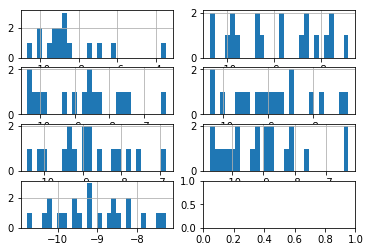

In [32]:
fig, axs = plt.subplots(4,2)
df_class0.hist(ax=axs[0,0],bins=28)
df_class1.hist(ax=axs[0,1],bins=28)
df_class2.hist(ax=axs[1,0],bins=28)
df_class3.hist(ax=axs[1,1],bins=28)
df_class4.hist(ax=axs[2,0],bins=28)
df_class5.hist(ax=axs[2,1],bins=28)
df_class6.hist(ax=axs[3,0],bins=28)


In [33]:
df_class0.dropna(axis=0, inplace=True)
df_class1.dropna(axis=0, inplace=True)
df_class2.dropna(axis=0, inplace=True)
df_class3.dropna(axis=0, inplace=True)
df_class4.dropna(axis=0, inplace=True)
df_class5.dropna(axis=0, inplace=True)
df_class6.dropna(axis=0, inplace=True)

In [34]:
print('df_class0.shape ',df_class0.shape)
print('df_class1.shape ',df_class1.shape)
print('df_class2.shape ',df_class2.shape)
print('df_class3.shape ',df_class3.shape)
print('df_class4.shape ',df_class4.shape)
print('df_class5.shape ',df_class5.shape)
print('df_class6.shape ',df_class6.shape)
print('total data no2_weather.shape ',no2_weather.shape)


df_class0.shape  (16,)
df_class1.shape  (19,)
df_class2.shape  (16,)
df_class3.shape  (18,)
df_class4.shape  (17,)
df_class5.shape  (21,)
df_class6.shape  (22,)
total data no2_weather.shape  (387, 14)


 
<div class="h3">ellipticEnvelope(gaussian distribution) for each catDayEmission</div>


In [35]:
## apply ellipticEnvelope(gaussian distribution) at each categories

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class0.values.reshape(-1,1)
envelope.fit(X_train)
df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(X_train)
df_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class1.values.reshape(-1,1)
envelope.fit(X_train)
df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(X_train)
df_class1['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class2.values.reshape(-1,1)
envelope.fit(X_train)
df_class2 = pd.DataFrame(df_class2)
df_class2['deviation'] = envelope.decision_function(X_train)
df_class2['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class3.values.reshape(-1,1)
envelope.fit(X_train)
df_class3 = pd.DataFrame(df_class3)
df_class3['deviation'] = envelope.decision_function(X_train)
df_class3['anomaly'] = envelope.predict(X_train)

In [36]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class4.values.reshape(-1,1)
envelope.fit(X_train)
df_class4 = pd.DataFrame(df_class4)
df_class4['deviation'] = envelope.decision_function(X_train)
df_class4['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class5.values.reshape(-1,1)
envelope.fit(X_train)
df_class5 = pd.DataFrame(df_class5)
df_class5['deviation'] = envelope.decision_function(X_train)
df_class5['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class6.values.reshape(-1,1)
envelope.fit(X_train)
df_class6 = pd.DataFrame(df_class6)
df_class6['deviation'] = envelope.decision_function(X_train)
df_class6['anomaly'] = envelope.predict(X_train)

 
<div class="h3">Day Emission with anomalies</div>

In [37]:
a0 = df_class0.loc[df_class0['anomaly'] == 1, 'no2_emission_sum']
b0 = df_class0.loc[df_class0['anomaly'] == -1, 'no2_emission_sum']

a1 = df_class1.loc[df_class1['anomaly'] == 1, 'no2_emission_sum']
b1 = df_class1.loc[df_class1['anomaly'] == -1, 'no2_emission_sum']

a2 = df_class2.loc[df_class2['anomaly'] == 1, 'no2_emission_sum']
b2 = df_class2.loc[df_class2['anomaly'] == -1, 'no2_emission_sum']

a3 = df_class3.loc[df_class3['anomaly'] == 1, 'no2_emission_sum']
b3 = df_class3.loc[df_class3['anomaly'] == -1, 'no2_emission_sum']

a4 = df_class4.loc[df_class4['anomaly'] == 1, 'no2_emission_sum']
b4 = df_class4.loc[df_class4['anomaly'] == -1, 'no2_emission_sum']

a5 = df_class5.loc[df_class5['anomaly'] == 1, 'no2_emission_sum']
b5 = df_class5.loc[df_class5['anomaly'] == -1, 'no2_emission_sum']

a6 = df_class6.loc[df_class6['anomaly'] == 1, 'no2_emission_sum']
b6 = df_class6.loc[df_class6['anomaly'] == -1, 'no2_emission_sum']

 <div class="h3">plot the N02 Day Emission with anomalies</div>

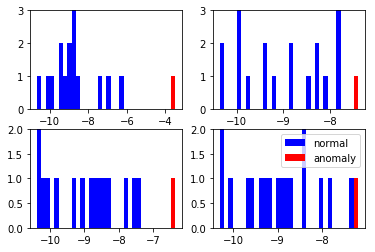

In [38]:

fig, axs = plt.subplots(2,2)
axs[0,0].hist([a0,b0], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[0,1].hist([a1,b1], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,0].hist([a2,b2], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,1].hist([a3,b3], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

 <div class="h3"> The day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.</div>

Monday NO2 emission stats. IN general Monday have more variation that other day of week

In [39]:
a0.describe()

count    15.000000
mean     -8.789860
std       1.167321
min     -10.659995
25%      -9.360241
50%      -8.969441
75%      -8.594975
max      -6.233891
Name: no2_emission_sum, dtype: float64

Tuesday NO2 emission stats.


In [40]:
a1.describe()

count    18.000000
mean     -9.019118
std       0.894385
min     -10.358213
25%      -9.871041
50%      -9.025858
75%      -8.293089
max      -7.780957
Name: no2_emission_sum, dtype: float64

Wednesday NO2 emission stats.
 

In [41]:
a3.describe()

count    17.000000
mean     -9.008258
std       0.838835
min     -10.300465
25%      -9.575988
50%      -9.013971
75%      -8.444563
max      -7.331113
Name: no2_emission_sum, dtype: float64

Thursday NO2 emission stats.


In [42]:
a4.describe()

count    16.000000
mean     -8.984148
std       0.820358
min     -10.441954
25%      -9.422967
50%      -8.947532
75%      -8.495585
max      -7.555138
Name: no2_emission_sum, dtype: float64

Monday, Tuesday, Wednesday, Thursday

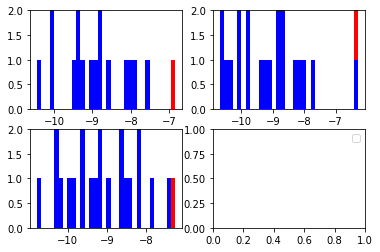

In [43]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist([a4,b4], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[0,1].hist([a5,b5], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
axs[1,0].hist([a6,b6], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])

plt.legend()
plt.show()

Friday NO2 emission stats.

In [44]:
a4.describe()

count    16.000000
mean     -8.984148
std       0.820358
min     -10.441954
25%      -9.422967
50%      -8.947532
75%      -8.495585
max      -7.555138
Name: no2_emission_sum, dtype: float64

Saturday NO2 emission stats.

In [45]:
a5.describe()

count    20.000000
mean     -9.168244
std       1.122363
min     -10.690633
25%     -10.071151
50%      -9.195670
75%      -8.591799
max      -6.377741
Name: no2_emission_sum, dtype: float64

Sunday NO2 emission stats.

In [46]:
a6.describe()

count    21.000000
mean     -9.166610
std       0.879311
min     -10.769930
25%      -9.842627
50%      -9.204490
75%      -8.572989
max      -7.416201
Name: no2_emission_sum, dtype: float64

Friday, Saturday, Sunday.

In [47]:
# add the data to the main 
df_class = pd.concat([df_class0, df_class1, df_class2, df_class3])
no2_weather['anomaly22'] = df_class['anomaly']
no2_weather['anomaly22'] = np.array(no2_weather['anomaly22'] == -1).astype(int) 

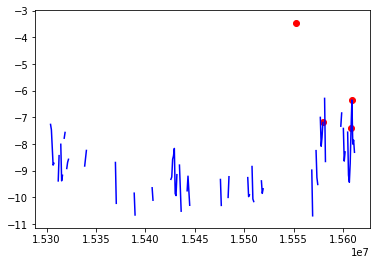

In [48]:
# visualisation of anomaly throughout time
fig, ax = plt.subplots()

a = no2_weather.loc[no2_weather['anomaly22'] == 1, ('time_epoch', 'no2_emission_sum')] #anomaly

ax.plot(no2_weather['time_epoch'], no2_weather['no2_emission_sum'], color='blue')
ax.scatter(a['time_epoch'],a['no2_emission_sum'], color='red')
plt.show()

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



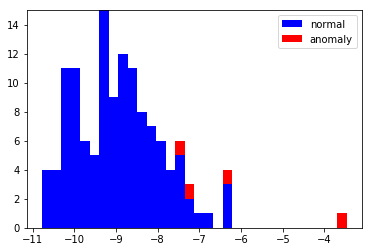

In [49]:
# visualisation of anomaly with temperature repartition
a = no2_weather.loc[no2_weather['anomaly22'] == 0, 'no2_emission_sum']
b = no2_weather.loc[no2_weather['anomaly22'] == 1, 'no2_emission_sum']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

Good detections of extreme values.

<div class="h2">Isolation Forest </div>
<a id="OUTLIER2"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [50]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/5p8B2Ikcw-k" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Unsupervised Anomaly Detection with Isolation Forest - Elena Sharov

In [51]:
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data_IF)
  
no2_weather['anomaly25'] = pd.Series(model.predict(data_IF))
no2_weather['anomaly25'] = no2_weather['anomaly25'].map( {1: 0, -1: 1} )
print(no2_weather['anomaly25'].value_counts())


0.0    127
1.0      2
Name: anomaly25, dtype: int64



<div class="h3">Visualisation of anomaly throughout time</div>
<a id="IF"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

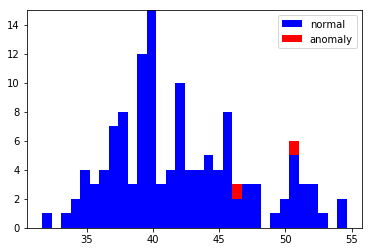

In [52]:
a = no2_weather.loc[no2_weather['anomaly25'] == 0, 'total_precipitation_surface_mean']
b = no2_weather.loc[no2_weather['anomaly25'] == 1, 'total_precipitation_surface_mean']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

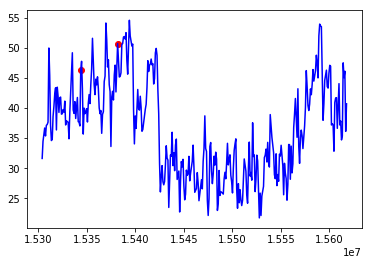

In [53]:
fig, ax = plt.subplots()

a = no2_weather.loc[no2_weather['anomaly25'] == 1, ['time_epoch', 'total_precipitation_surface_mean']] #anomaly

ax.plot(no2_weather['time_epoch'], no2_weather['total_precipitation_surface_mean'], color='blue')
ax.scatter(a['time_epoch'],a['total_precipitation_surface_mean'], color='red')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6575: RuntimeWarning:

All-NaN axis encountered

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6576: RuntimeWarning:

All-NaN axis encountered

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



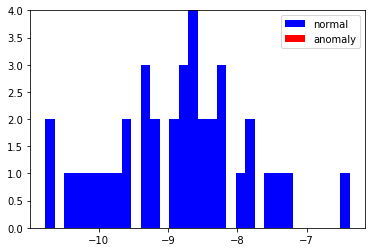

In [54]:
a = no2_weather.loc[no2_weather['anomaly25'] == 0, 'no2_emission_sum']
b = no2_weather.loc[no2_weather['anomaly25'] == 1, 'no2_emission_sum']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

ax.scatter(a['time_epoch'],a['no2_emission_sum'], color='red')
no2_emission_sum

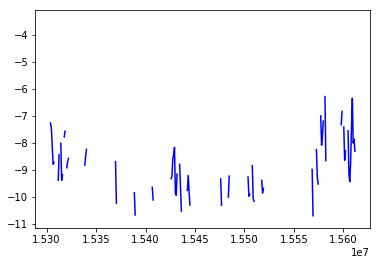

In [55]:
fig, ax = plt.subplots()

a = no2_weather.loc[no2_weather['anomaly25'] == 1, ['time_epoch', 'no2_emission_sum']] #anomaly

ax.plot(no2_weather['time_epoch'], no2_weather['no2_emission_sum'], color='blue')
ax.scatter(a['time_epoch'],a['no2_emission_sum'], color='red')
plt.show()

<div class="h2">One class SVM</div>
<a id="OUTLIER3"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [56]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/086OcT-5DYI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Anomaly Detection Problem | Motivation — [ Machine Learning | Andrew Ng ]

In [57]:
# Take useful feature and standardize them 
data_SVM = no2_weather[['time_epoch','DayOfTheWeek','day','no2_emission_sum','temperature_2m_above_ground_mean','specific_humidity_2m_above_ground_mean','relative_humidity_2m_above_ground_mean','u_component_of_wind_10m_above_ground_mean','v_component_of_wind_10m_above_ground_mean','total_precipitation_surface_mean']]
data_SVM.dropna(axis=0, inplace=True)
print(data_SVM.shape)


min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_SVM)
# train one class SVM 
model =  OneClassSVM(nu=0.95 * outliers_fraction) #nu=0.95 * outliers_fraction  + 0.05
data_SVM = pd.DataFrame(np_scaled)
model.fit(data_SVM)
# add the data to the main  
no2_weather['anomaly26'] = pd.Series(model.predict(data_SVM))
no2_weather['anomaly26'] = no2_weather['anomaly26'].map( {1: 0, -1: 1} )
print(no2_weather['anomaly26'].value_counts())

(129, 10)
0.0    114
1.0     15
Name: anomaly26, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




<div class="h3">Visualisation of anomaly throughout time</div>
<a id="IF"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

total precipitation surface mean

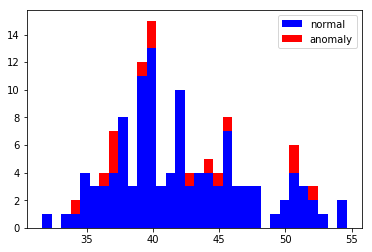

In [58]:
a = no2_weather.loc[no2_weather['anomaly26'] == 0, 'total_precipitation_surface_mean']
b = no2_weather.loc[no2_weather['anomaly26'] == 1, 'total_precipitation_surface_mean']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

total_precipitation_surface_mean

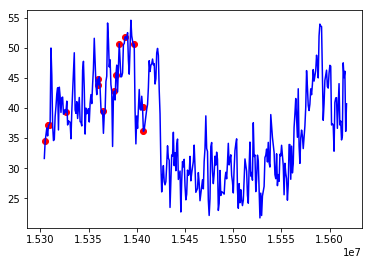

In [59]:
fig, ax = plt.subplots()

a = no2_weather.loc[no2_weather['anomaly26'] == 1, ['time_epoch', 'total_precipitation_surface_mean']] #anomaly

ax.plot(no2_weather['time_epoch'], no2_weather['total_precipitation_surface_mean'], color='blue')
ax.scatter(a['time_epoch'],a['total_precipitation_surface_mean'], color='red')
plt.show()

no2 emission sum

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



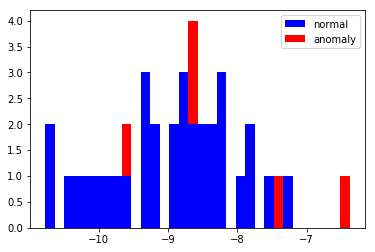

In [60]:
a = no2_weather.loc[no2_weather['anomaly26'] == 0, 'no2_emission_sum']
b = no2_weather.loc[no2_weather['anomaly26'] == 1, 'no2_emission_sum']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

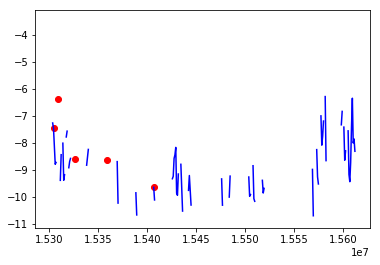

In [61]:
fig, ax = plt.subplots()

a = no2_weather.loc[no2_weather['anomaly26'] == 1, ['time_epoch', 'no2_emission_sum']] #anomaly

ax.plot(no2_weather['time_epoch'], no2_weather['no2_emission_sum'], color='blue')
ax.scatter(a['time_epoch'],a['no2_emission_sum'], color='red')
plt.show()



<div class="h3">Our purpose is to detect these abnormal observations in advance!</div>


Creating features

In [62]:
no2_weather['yr'] = no2_weather.start_date.dt.year
no2_weather['mt'] = no2_weather.start_date.dt.month
no2_weather['d'] = no2_weather.start_date.dt.day

no2_weather['weekday'] = no2_weather.start_date.dt.weekday
no2_weather['weekday_mean'] = no2_weather.weekday.replace(no2_weather[:199].groupby('weekday')['no2_emission_sum'].mean().to_dict())

In [63]:
no2_weather.head(2)

start_date  no2_emission_sum        date  temperature_2m_above_ground_mean  \
0 2018-07-01         -7.264573  2018-07-01                         26.698238   
1 2018-07-02         -7.466619  2018-07-02                         26.502170   

   specific_humidity_2m_above_ground_mean  \
0                                0.016360   
1                                0.017176   

   relative_humidity_2m_above_ground_mean  \
0                               75.190846   
1                               79.500569   

   u_component_of_wind_10m_above_ground_mean  \
0                                  -3.427650   
1                                  -3.063298   

   v_component_of_wind_10m_above_ground_mean  \
0                                  -1.093313   
1                                  -0.446986   

   total_precipitation_surface_mean  day  DayOfTheWeek  catDayEmission  \
0                         31.623991    1             6               6   
1                         34.462254    2             0               0   

   catDayEPrecSurfaceMean  time_epoch  anomaly22  anomaly25  anomaly26    yr  \
0                       6    15304032          0        0.0        0.0  2018   
1                       0    15304896          0        0.0        1.0  2018   

   mt  d  weekday  weekday_mean  
0   7  1        6     -9.121115  
1   7  2        0     -9.189096

<div class="h3">Time lag feature - week X Correlation coef </div>

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning:

divide by zero encountered in true_divide



Text(0, 0.5, 'correlation coeff')

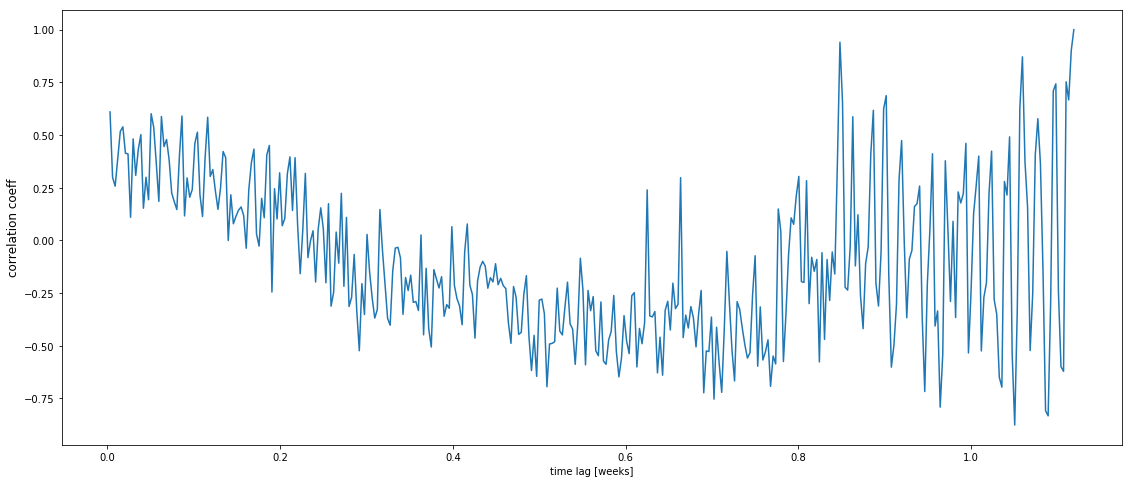

In [64]:
timeLags = np.arange(1,10*48*7)
autoCorr = [no2_weather.no2_emission_sum.autocorr(lag=dt) for dt in timeLags]
plt.figure(figsize=(19,8))
plt.plot(1.0/(48*7)*timeLags, autoCorr)
plt.xlabel('time lag [weeks]')
plt.ylabel('correlation coeff', fontsize=12)

AutoCorrelation 10 weeks depth

The NO2 demand seems to be driven by a weekly trend: on certain days of the week, is higher than the others. We simply prove this computing autocorrelation.

<div class="h1"> Prediction using LSTM with Python</div>
<a id="LSTM1"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [65]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/9zhrxE5PQgY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Recurrent Networks can be improved to remember long range dependencies by using whats called a Long-Short Term Memory (LSTM) Cell. Let's build one using just numpy! I'll go over the cell components as well as the forward and backward pass logic
  

In [66]:
data_ = no2_weather.loc[:,['start_date','no2_emission_sum']] 
data_['start_date'] = pd.to_datetime(no2_weather['start_date'])
data_.set_index('start_date', inplace=True)
data_ = data_.resample("1D").sum() # day sum

In [67]:
#Create a new dataframe with only the 'no2_emission_sum column
data_2 = data_.filter(['no2_emission_sum'])
#Convert the dataframe to a numpy array
dataset = data_2.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

292

In [68]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# scaled_data

#### Create the training data set andC create the scaled training data set

In [69]:
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(129, len(train_data)):
    x_train.append(train_data[i-129:i, 0])
    y_train.append(train_data[i, 0])
#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print()

In [70]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [71]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Build the LSTM model

In [72]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#### Compile and Train the model

In [73]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
163/163 [==============================] - 17s 107ms/step - loss: 0.2078


In [74]:
#Create the testing data set
test_data = scaled_data[training_data_len - 129: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(129, len(test_data)):
    x_test.append(test_data[i-129:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


<div class="h2">Get the root mean squared error (RMSE)</div>
<a id="LSTM2"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)



In [75]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.2955882207340474

### Visualize the data


In [76]:
# Plot the data
train = data_[:training_data_len]
valid = data_[training_data_len:]
valid['Predictions'] = predictions

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



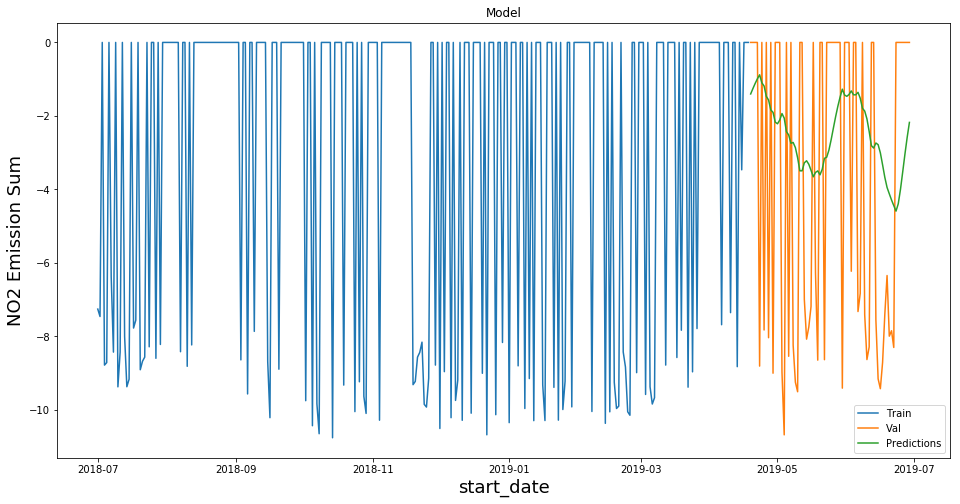

In [77]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('start_date', fontsize=18)
plt.ylabel('NO2 Emission Sum', fontsize=18)
plt.plot(train['no2_emission_sum'])
plt.plot(valid[['no2_emission_sum', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



<div class="h3">30 days NO2 average</div>


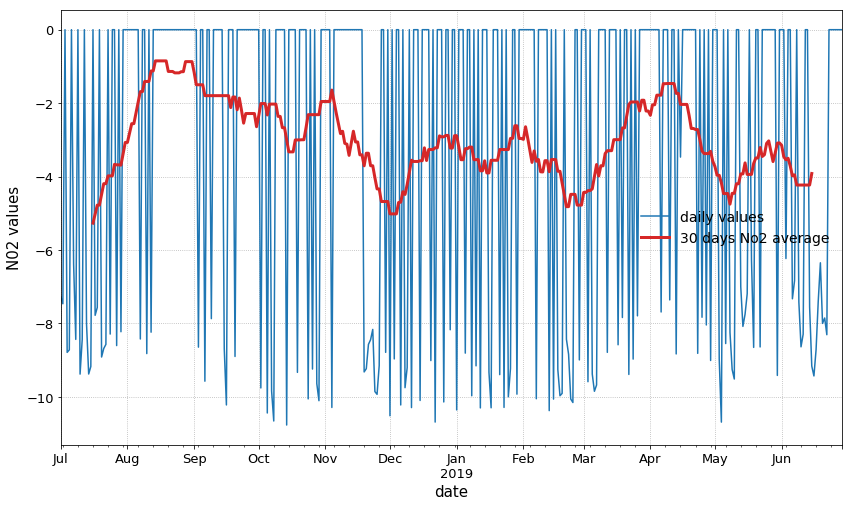

In [78]:
f, ax = plt.subplots(figsize=(14,8))
pd.plotting.register_matplotlib_converters() # Add this 
data_.plot(ax=ax, color='C0')
data_.rolling(window=30, center=True).mean().plot(ax=ax, ls='-', lw=3, color='C3')
ax.grid(ls=':')
ax.legend(['daily values','30 days No2 average'], frameon=False, fontsize=14)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
ax.set_xlabel('date', fontsize=15)
ax.set_ylabel('N02 values', fontsize=15);
# ax.axvline('2018', color='0.8', lw=8, zorder=-1)

high NO2 mean in September

<div class="h1"> ARIMA with Python</div>
<a id="ARP"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
  

In [79]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/zlZaOnBbpUg?list=PL436A4F939FBE10D7" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

The Analysis of Time Series

Printing a summary of the fit model.
This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

In [80]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

arimaM = ARIMA(data, order=(5,1,0))
arimaMfit = arimaM.fit(disp=0)
print(arimaMfit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D.no2_emission_sum   No. Observations:                  128
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -253.363
Method:                       css-mle   S.D. of innovations              1.746
Date:                Tue, 24 Mar 2020   AIC                            520.726
Time:                        17:02:28   BIC                            540.691
Sample:                             1   HQIC                           528.838
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0016      0.058     -0.027      0.978      -0.116       0.113
ar.L1.D.no2_emission_sum    -0.7566      0.089     -8.537      0.000      -0.930      -0.

We get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model and 

we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

<div class="h3"> # plot residual errors </div>
<a id="P"></a>
  

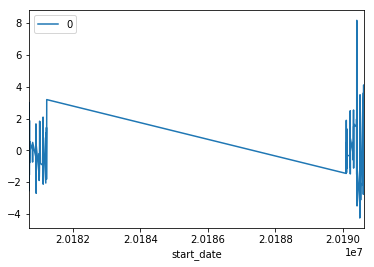

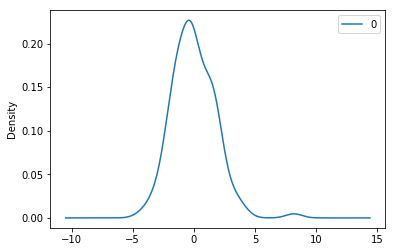

                0
count  128.000000
mean    -0.015326
std      1.756391
min     -4.261842
25%     -1.255444
50%     -0.215685
75%      1.156998
max      8.177379


In [81]:
errors = pd.DataFrame(arimaMfit.resid)
errors.plot()
pyplot.show()
errors.plot(kind='kde')
pyplot.show()
print(errors.describe())

The distribution of the residual errors is displayed. 
The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).


<div class="h2"> Rolling Forecast ARIMA Model</div>
<a id="ARP2"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)


In [82]:
X = data.values
size = int(len(X) * 0.70)
limitCount = 40
train, test = X[0:size], X[size:size+limitCount]
history = [x for x in train]

We can also calculate a final mean squared error score (MSE) and (RMSLE) for the predictions, providing a point of comparison for other ARIMA configurations.

In [83]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [84]:
pred = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    pred.append(yhat)
    obs = test[t]
    history.append(obs)
    print('pred=%f, exp=%f' % (yhat, obs))
error = mean_squared_error(test, pred)
error2 = rmsle(pred,test)

print('Mean Squared Error: %.3f' % error)
print('RMSLE: %.3f' % error)


pred=15.974046, exp=15.846805
pred=16.395048, exp=17.968414
pred=16.460271, exp=18.157285
pred=16.318467, exp=18.748906
pred=17.744167, exp=16.099974
pred=17.316660, exp=25.752425
pred=19.242412, exp=16.128544
pred=19.404090, exp=17.898682
pred=20.280364, exp=17.520550
pred=20.366603, exp=15.779341
pred=17.228682, exp=15.839288
pred=17.410855, exp=12.756861
pred=15.656714, exp=16.609515
pred=14.696628, exp=17.153377
pred=14.787497, exp=15.336838
pred=15.612153, exp=14.870831
pred=16.148525, exp=19.395480
pred=16.433173, exp=17.449972
pred=16.366408, exp=18.044694
pred=17.690225, exp=19.053027
pred=18.640509, exp=20.679096
pred=18.947951, exp=16.420762
pred=18.914691, exp=16.442516
pred=18.761961, exp=15.046952
pred=16.985869, exp=20.778997
pred=16.488036, exp=18.803997
pred=17.223425, exp=19.693735
pred=18.682917, exp=18.650838
pred=19.656095, exp=16.448573
pred=18.624301, exp=17.067607
pred=18.080326, exp=18.400751
pred=17.599538, exp=15.503088
pred=16.950901, exp=15.020942
pred=16.63

A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). 
We can see the values show some trend and are in the correct scale

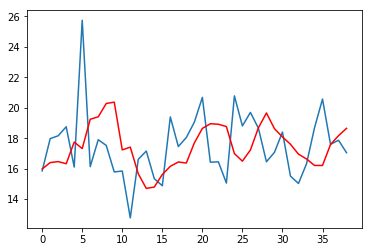

In [85]:
pyplot.plot(test)
pyplot.plot(pred, color='red')
pyplot.show()

<div class="h1">Time series prediction using Prophet in Python</div>
<a id="PRO"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)


In [86]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

HTML('<iframe width="700" height="400" src="https://www.youtube.com/embed/pOYAXv15r3A" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Delivered by Sean Taylor (Facebook) at the 2018 New York R Conference at Work-Bench on April April 20 and 21

<div class="h3">Advantages of using Prophet</div>
- Accommodates seasonality with multiple periods
- Prophet is resilient to missing values
- Best way to handle outliers in Prophet is to remove them
- Fitting of the model is fast
- Intuitive hyper parameters which are easy to tune

Define Prophet dataset

In [87]:
X= no2_weather[['start_date','no2_emission_sum','temperature_2m_above_ground_mean','specific_humidity_2m_above_ground_mean','relative_humidity_2m_above_ground_mean',
            'u_component_of_wind_10m_above_ground_mean','v_component_of_wind_10m_above_ground_mean','total_precipitation_surface_mean']]
y=no2_weather['no2_emission_sum']

### Creating the data set for Prophet

In [88]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(no2_weather["start_date"])
train_dataset['y']=y
train_dataset.head(2)

ds         y
0 2018-07-01 -7.264573
1 2018-07-02 -7.466619

In [89]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

<div class="h3">Predicting the values for the future</div>

For predicting the values using Prophet, we need to create a dataframe with ds(datetime stamp) containing the dates for which we want to make the predictions.
We use make_future_dataframe() to which we specify the number of days to extend into the future. By default it includes dates from the history

In [90]:
future= prophet_basic.make_future_dataframe(periods=30)
future.tail()

ds
412 2019-07-25
413 2019-07-26
414 2019-07-27
415 2019-07-28
416 2019-07-29

Our prediction contains historical dates with 30 days.

In [91]:
forecast=prophet_basic.predict(future)

<div class='h3'>Plotting the predicted data</div>


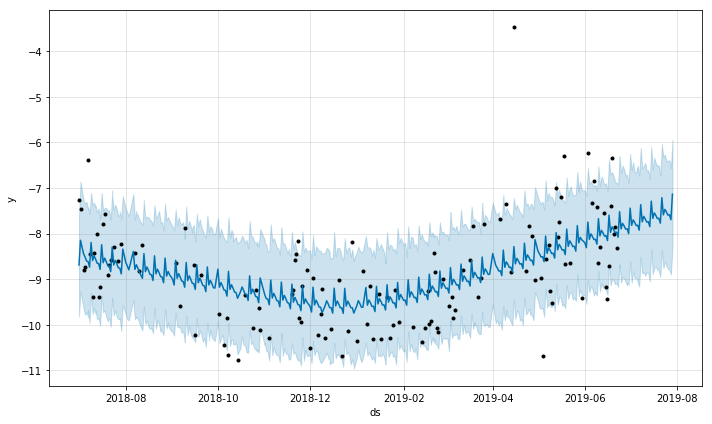

In [92]:
fig1 =prophet_basic.plot(forecast)

<div class='h3'>Plotting the forecasted components</div>
We can plot the trend and seasonality, components of the forecast.

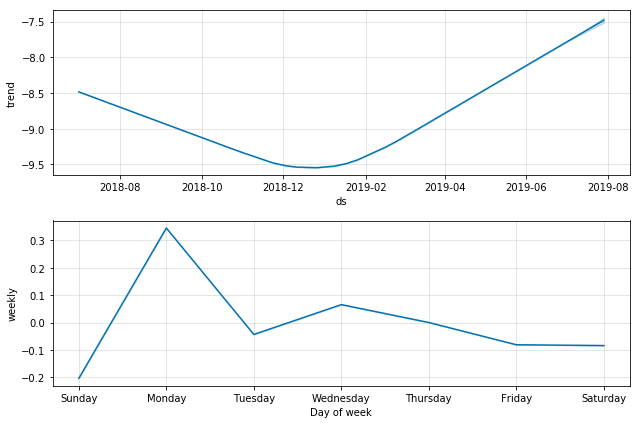

In [93]:
fig1 = prophet_basic.plot_components(forecast)

The trend shows that the days as Monday, Weednesday have high values and the last month of year have high values. 

<div class="h2">Forecast quality evaluation</div>
<a id="PRO1"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)


Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations  yi  and the corresponding predicted values  y^i .

Let's look into the object forecast that the library created for us:

In [94]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(prophet_basic, horizon='30 days')
df_p = performance_metrics(df_cv)
df_p.head(30)

horizon       mse      rmse       mae      mape  coverage
0   3 days  0.755254  0.869054  0.691969  0.080112  0.764706
1   4 days  0.730726  0.854825  0.671137  0.077129  0.764706
2   5 days  0.862930  0.928940  0.762139  0.088940  0.705882
3   6 days  0.716169  0.846268  0.700081  0.079831  0.705882
4   7 days  2.673484  1.635079  1.047754  0.177913  0.661765
5   8 days  2.691344  1.640532  1.060220  0.180859  0.635294
6   9 days  2.550110  1.596906  1.001817  0.171559  0.600000
7  10 days  2.133964  1.460809  1.044294  0.155137  0.470588
8  11 days  1.501443  1.225334  0.973912  0.116972  0.470588
9  12 days  1.594842  1.262870  0.988694  0.118144  0.509804
10 13 days  1.409499  1.187223  0.924181  0.106088  0.638655
11 14 days  1.360024  1.166201  0.877879  0.103162  0.670588
12 15 days  0.906848  0.952286  0.686588  0.082291  0.689076
13 16 days  0.754508  0.868624  0.658506  0.076470  0.647059
14 17 days  1.216731  1.103055  0.881382  0.104109  0.552941
15 18 days  1.263922  1.124243  0.932871  0.109878  0.588235
16 19 days  1.067836  1.033361  0.809433  0.096239  0.641711
17 20 days  1.162382  1.078138  0.881368  0.103930  0.598930
18 21 days  0.779315  0.882788  0.667240  0.077051  0.720588
19 22 days  2.836725  1.684258  0.960171  0.172607  0.735294
20 23 days  2.643097  1.625761  0.892527  0.163708  0.788235
21 24 days  2.815558  1.677962  1.014420  0.176188  0.705882
22 25 days  1.256811  1.121076  0.943081  0.111727  0.529412
23 26 days  1.435013  1.197920  1.024441  0.124032  0.470588
24 27 days  1.425578  1.193976  1.020245  0.124609  0.487395
25 28 days  1.451609  1.204827  0.982079  0.117334  0.617647
26 29 days  1.601590  1.265539  1.020500  0.121846  0.676471
27 30 days  1.219703  1.104402  0.897105  0.107274  0.588235

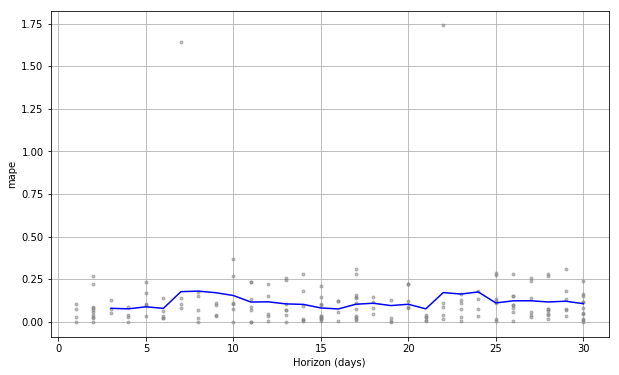

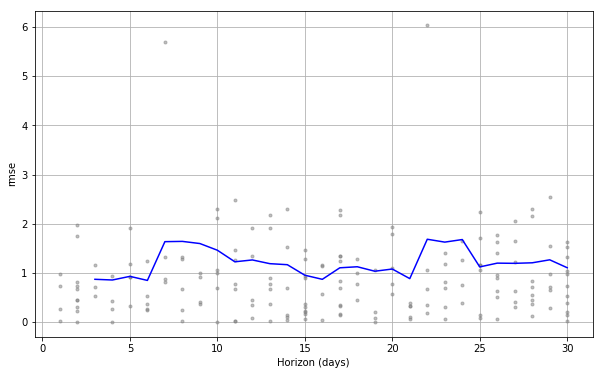

In [95]:
from fbprophet.plot import plot_cross_validation_metric
fig_mape = plot_cross_validation_metric(df_cv, metric='mape')
fig_rmse = plot_cross_validation_metric(df_cv, metric='rmse')


It shows that 10 days forecast results in around 10% error.

#### Adding ChangePoints to Prophet
Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

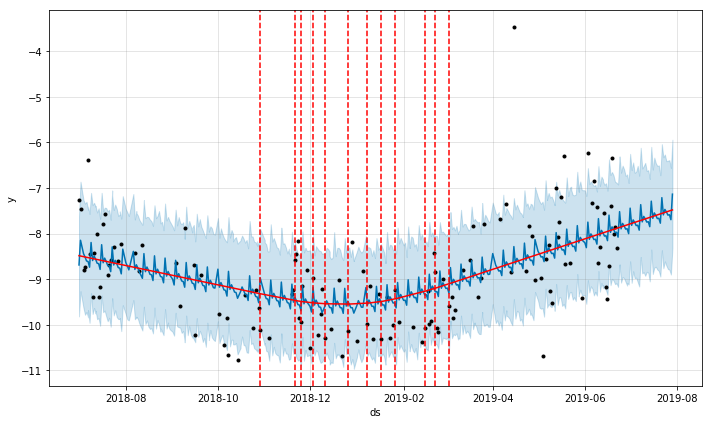

In [96]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

We can view the dates where the chagepoints occurred

In [97]:
prophet_basic.changepoints[:10]

4    2018-07-07
8    2018-07-13
12   2018-07-18
16   2018-07-24
20   2018-08-10
24   2018-09-09
29   2018-10-05
33   2018-10-19
37   2018-10-29
41   2018-11-21
Name: ds, dtype: datetime64[ns]

We can change the inferred changepoint range by setting the changepoint_range

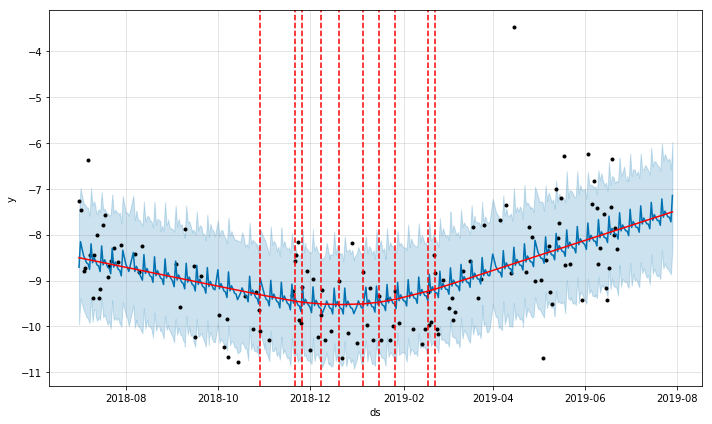

In [98]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible

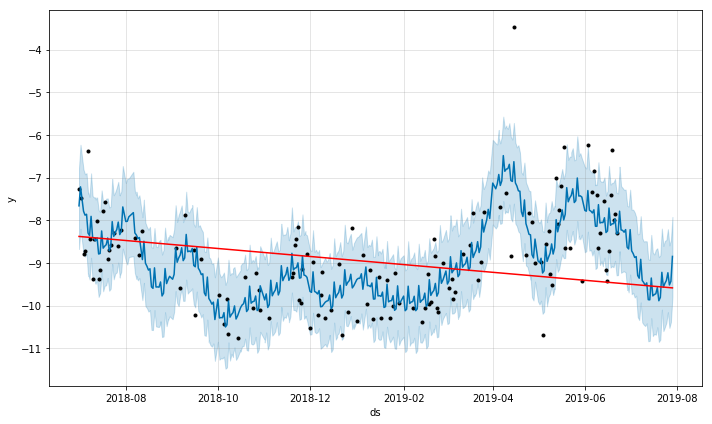

In [99]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

<div class="h2">Incorporating the effects of weather condition</div>
<a id="PRO2"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)



> Now we add  as extra regressors in the fbprophet model

In [100]:
train_dataset['temperature_2m_above_ground_mean'] = X['temperature_2m_above_ground_mean']
train_dataset['specific_humidity_2m_above_ground_mean'] = X['specific_humidity_2m_above_ground_mean']
train_dataset['relative_humidity_2m_above_ground_mean'] = X['relative_humidity_2m_above_ground_mean']
train_dataset['u_component_of_wind_10m_above_ground_mean'] = X['u_component_of_wind_10m_above_ground_mean']
train_dataset['v_component_of_wind_10m_above_ground_mean'] = X['v_component_of_wind_10m_above_ground_mean']
train_dataset['total_precipitation_surface_mean'] = X['total_precipitation_surface_mean']

train_X= train_dataset[:200]
test_X= train_dataset[200:]


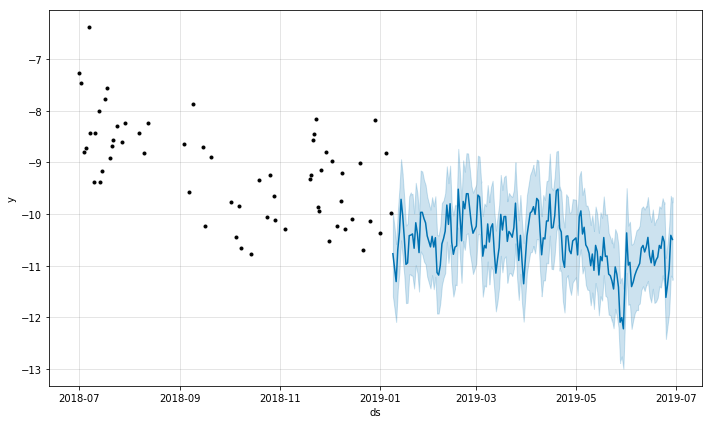

In [101]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('temperature_2m_above_ground_mean')
pro_regressor.add_regressor('specific_humidity_2m_above_ground_mean')
pro_regressor.add_regressor('relative_humidity_2m_above_ground_mean')
pro_regressor.add_regressor('u_component_of_wind_10m_above_ground_mean')
pro_regressor.add_regressor('v_component_of_wind_10m_above_ground_mean')
pro_regressor.add_regressor('total_precipitation_surface_mean')
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=30) # 30 days
#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

Predicted data is the blue shaded region at the end.

<div class="h2">Forecast quality evaluation</div>
<a id="PRO3"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)


Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations  yi  and the corresponding predicted values  y^i .


In [102]:
df_cv_reg = cross_validation(pro_regressor, horizon='30 days')
df_p_reg = performance_metrics(df_cv_reg)
df_p_reg.head(30)

horizon       mse      rmse       mae      mape  coverage
0   3 days  0.459533  0.677889  0.668612  0.069127  0.400000
1   4 days  0.625423  0.790837  0.749528  0.074041  0.400000
2   5 days  0.558856  0.747567  0.671902  0.066643  0.500000
3   6 days  0.586952  0.766128  0.696502  0.068753  0.600000
4   7 days  0.776267  0.881060  0.794464  0.076820  0.600000
5   9 days  0.595237  0.771516  0.692999  0.071168  0.600000
6  10 days  0.548509  0.740614  0.625314  0.063674  0.600000
7  11 days  0.467986  0.684095  0.600679  0.064481  0.500000
8  12 days  0.668533  0.817639  0.764736  0.082941  0.400000
9  13 days  1.247184  1.116774  1.014051  0.112565  0.400000
10 14 days  1.955073  1.398239  1.189758  0.134603  0.400000
11 15 days  1.213841  1.101744  0.782404  0.087787  0.600000
12 16 days  0.461965  0.679680  0.408539  0.044888  0.866667
13 17 days  0.233925  0.483658  0.369929  0.038226  0.800000
14 18 days  0.644205  0.802624  0.614956  0.063451  0.600000
15 19 days  0.960224  0.979910  0.825899  0.083898  0.400000
16 20 days  1.622570  1.273801  1.199301  0.131316  0.133333
17 21 days  1.732372  1.316196  1.294902  0.140527  0.000000
18 22 days  1.421494  1.192264  1.156297  0.124810  0.000000
19 23 days  1.097320  1.047531  0.946885  0.103969  0.200000
20 24 days  0.970985  0.985386  0.901204  0.096865  0.200000
21 25 days  0.562492  0.749994  0.688985  0.071038  0.600000
22 26 days  0.581039  0.762259  0.722980  0.077748  0.800000
23 27 days  0.427967  0.654192  0.613358  0.068486  0.600000
24 28 days  0.974358  0.987096  0.896307  0.098535  0.200000
25 29 days  1.404622  1.185167  1.003947  0.114008  0.266667
26 30 days  0.984912  0.992427  0.778778  0.087704  0.400000

The RMSE for 30 days its 0.984912.

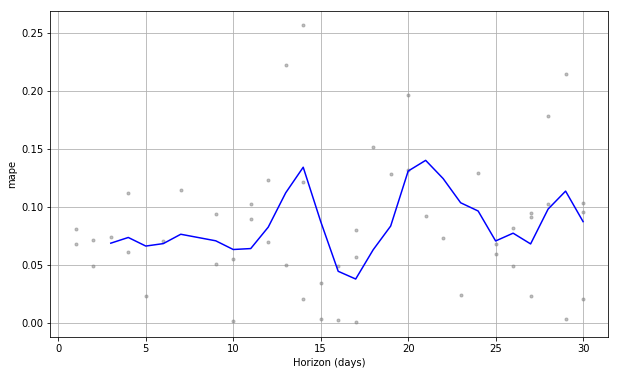

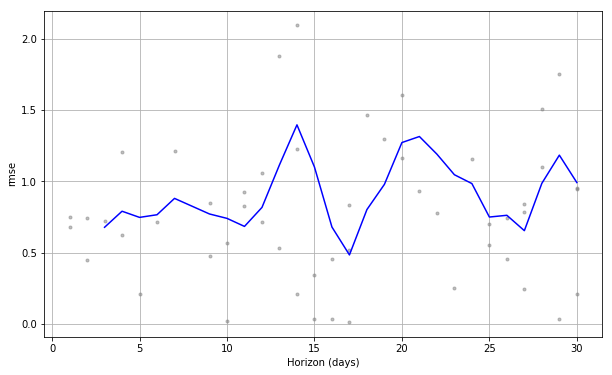

In [103]:
fig_mape_reg = plot_cross_validation_metric(df_cv_reg, metric='mape')
fig_mape_reg = plot_cross_validation_metric(df_cv_reg, metric='rmse')


It shows that 10 days forecast results in around ~7% error.

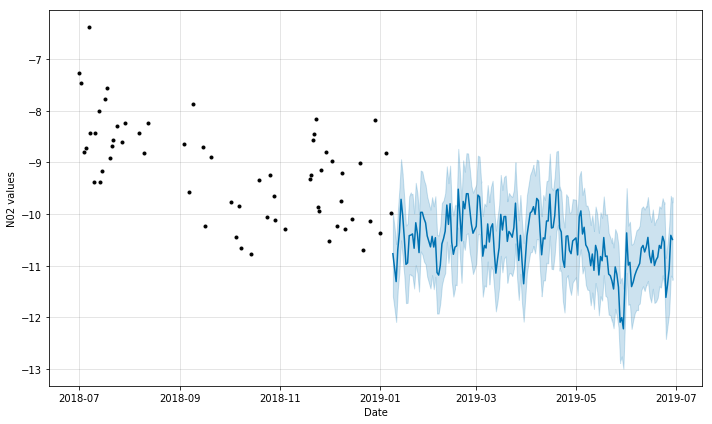

In [104]:
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py

fig_d_reg = plot_plotly(pro_regressor, forecast_data)

py.iplot(fig_d_reg) 

fig_d_reg = pro_regressor.plot(forecast_data,xlabel='Date',ylabel='N02 values')


- ds — forecast date
- yhat — forecast value for the given date
- yhat_lower — lower forecast boundary for the given date
- yhat_uppet — upper forecast boundary for the given date
Calling plot function for Prophet model displays how the model was trained according to training data (black points — training data, blue line — forecast value, light blue area — forecast boundaries):

## We can see that the Best Approach is Prophet.

<div class="h2">Save The Model</div>
<a id="PRO4"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)

The model should be re-trained when new data becomes available. There is no point to re-train model, if data is not changed. Save model instead and use it again, when user wants to call predict function. Use pickle functionality for that:


In [105]:
import pickle
with open('forecast_model_No2.pckl', 'wb') as fout:
    pickle.dump(pro_regressor, fout)
with open('forecast_model_No2.pckl', 'rb') as fin:
    m2 = pickle.load(fin)


<div class="h1">Prediction of  NO2 density for each primary_fuel throughout the year</div>
<a id="M1"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)

<div class="h3">Regional NO2 Density</div>

In [106]:
from datetime import datetime
files=[]
for dirname, _, filenames in os.walk('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/s5p_no2'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

# read all the absorbing aerosol index data into one list of arrays
no2_first_day=[]
no2_first_key=[]
no2_arr=[]
band=0 #  NO2_column_number_density
for i in range(0,len(files)):
    no2_first_day.append(datetime.strptime(files[i][76:91], '%Y%m%dT%H%M%S').date())
    no2_first_key.append(datetime.strptime(files[i][76:91], '%Y%m%dT%H%M%S').toordinal()+1) # correction of + 1 day in order to sync on climate data
    no2_arr.append(rio.open(files[i]).read(band+1))



In [107]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

a=[]
a_pos=[]
for i in range(0,len(no2_arr)): 
    a.append(np.nanmean(no2_arr[i]))
    a_pos.append(np.nanmean(np.clip(no2_arr[i],0,10000)))
    
no2_rgn=pd.DataFrame({ 'start_date': no2_first_day,'no2_rgn' : a_pos, 'key_date' : no2_first_key })
no2_rgn=no2_rgn.sort_values('start_date')
no2_rgn=no2_rgn.reset_index()

In [108]:
# read only the NO2 index arrays with a nan-percentage <5% into one list of arrays for calculation of local NO2 data
files=[]
for dirname, _, filenames in os.walk('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/s5p_no2'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

no2_first_day=[]
no2_first_key=[]
no2_arr=[]
band=0 # NO2_column_number_density
for i in range(0,len(files)):
    a=rio.open(files[i]).read(band+1)
    if pd.isnull(a).sum().sum() < 3515:
        no2_first_day.append(datetime.strptime(files[i][76:91], '%Y%m%dT%H%M%S').date())
        no2_first_key.append(datetime.strptime(files[i][76:91], '%Y%m%dT%H%M%S').toordinal()+1) # correction of + 1 day in order to sync on climate data
        no2_arr.append(np.clip(a,0,10000))  # clip negative values to zero

<div class="h3">Local NO2 Density</div>

In [109]:
gray= power_plants[['name','primary_fuel','capacity_mw','img_idx_lt','img_idx_lg','plant']].copy() 
gray.head()

name primary_fuel  capacity_mw  img_idx_lt  img_idx_lg     plant
0       Aguirre          Oil       1492.0         137         241  Ague_Oil
1     Costa Sur          Oil        990.0         126         123  Cosr_Oil
2   San Juan CC          Oil        864.0          36         270  SanC_Oil
3     Palo Seco          Oil        602.0          30         260  Palo_Oil
4  EcoEléctrica          Gas        507.0         130         123  Ecoa_Gas

In [110]:
pollute_clean_primary_fuel= power_plants.loc[((power_plants['primary_fuel']=='Coal') | (power_plants['primary_fuel']=='Oil') | (power_plants['primary_fuel']=='Gas')),['name','primary_fuel','capacity_mw','img_idx_lt','img_idx_lg','plant']]
pollute_clean_primary_fuel.head()

name primary_fuel  capacity_mw  img_idx_lt  img_idx_lg     plant
0       Aguirre          Oil       1492.0         137         241  Ague_Oil
1     Costa Sur          Oil        990.0         126         123  Cosr_Oil
2   San Juan CC          Oil        864.0          36         270  SanC_Oil
3     Palo Seco          Oil        602.0          30         260  Palo_Oil
4  EcoEléctrica          Gas        507.0         130         123  Ecoa_Gas

NO2_column_number_density value in proximity of all plants with all locations in location mask - proximity is +/- n points from location of plant. More information [here](https://www.kaggle.com/tiurii/ds4g-modelling-of-emissions-of-power-plants), @tiurii


In [111]:
# NO2_column_number_density value in proximity of all plants with all locations in location mask - proximity is +/- n points from location of plant
n=11
no2_=[]
for j in range(0,len(gray)):
    idx_lt=gray.iloc[j,3]
    idx_lg=gray.iloc[j,4]
    no2_j=[]
    for i in range(0,len(no2_arr)):
        no2_j.append(np.nanmean(no2_arr[i][idx_lt-n:idx_lt+n,idx_lg-n:idx_lg+n])) # calculate average of no2 for location of plant
    
    no2_.append(no2_j)

In [112]:
aa=pd.DataFrame({'key_date':np.array(no2_first_key), 'start_date': no2_first_day}) 

for j in range(0,len(gray)):
    aa[gray.iloc[j,5]]=no2_[j]  # add average of N02 for location of plant to dataframe with column name from df gray.plant

print('size of dataframe with aai data for gray-energy power-plant locations: ',aa.shape)
# sorting dataframe on date to produce ordered time series
aa=aa.sort_values('key_date')
aa=aa.reset_index()
aa=aa.drop(columns=['index'])
aa=aa.fillna(0)
aa.head()

size of dataframe with aai data for gray-energy power-plant locations:  (324, 37)


key_date  start_date  Ague_Oil  Cosr_Oil  SanC_Oil  Palo_Oil  Ecoa_Gas  \
0    736877  2018-07-01  0.000058  0.000061  0.000057  0.000057  0.000060   
1    736878  2018-07-02  0.000058  0.000063  0.000052  0.000051  0.000064   
2    736880  2018-07-04  0.000064  0.000062  0.000055  0.000055  0.000062   
3    736881  2018-07-05  0.000059  0.000054  0.000059  0.000060  0.000053   
4    736882  2018-07-06  0.000060  0.000062  0.000050  0.000048  0.000062   

   A.E._Coal  Came_Oil  Mayz_Gas  Palo_Gas  Sanm_Wind  Orim_Solar  Yaba_Gas  \
0   0.000056  0.000056  0.000056  0.000057   0.000064    0.000052  0.000059   
1   0.000057  0.000056  0.000055  0.000051   0.000063    0.000047  0.000055   
2   0.000061  0.000059  0.000058  0.000055   0.000064    0.000058  0.000059   
3   0.000057  0.000053  0.000063  0.000060   0.000053    0.000053  0.000064   
4   0.000057  0.000056  0.000058  0.000048   0.000065    0.000050  0.000056   

   Dago_Gas  Ague_Gas  Jobs_Gas  Vega_Gas  Cosr_Gas  Sanm_Solar  Loik_Solar  \
0  0.000057  0.000058  0.000056  0.000066  0.000061    0.000053    0.000053   
1  0.000051  0.000058  0.000058  0.000054  0.000063    0.000053    0.000053   
2  0.000056  0.000065  0.000063  0.000059  0.000062    0.000053    0.000054   
3  0.000052  0.000059  0.000057  0.000058  0.000054    0.000061    0.000060   
4  0.000048  0.000060  0.000057  0.000056  0.000062    0.000051    0.000050   

   Yau1_Hydro  AESa_Solar  Puna_Wind  Cao1_Hydro  Sals_Solar  Doss_Hydro  \
0    0.000056    0.000056   0.000054    0.000059    0.000057    0.000056   
1    0.000059    0.000057   0.000053    0.000056    0.000058    0.000057   
2    0.000062    0.000061   0.000053    0.000057    0.000066    0.000055   
3    0.000056    0.000057   0.000055    0.000057    0.000062    0.000056   
4    0.000059    0.000058   0.000046    0.000057    0.000061    0.000059   

   Car1_Hydro  Yau2_Hydro  Tor1_Hydro  Gar1_Hydro  VieP_Oil  Gar2_Hydro  \
0    0.000058    0.000058    0.000055    0.000057  0.000059    0.000059   
1    0.000059    0.000058    0.000059    0.000058  0.000058    0.000059   
2    0.000065    0.000060    0.000060    0.000061  0.000058    0.000061   
3    0.000067    0.000053    0.000064    0.000058  0.000058    0.000058   
4    0.000063    0.000059    0.000056    0.000063  0.000053    0.000064   

   Ríoo_Hydro  Wine_Solar  Cao2_Hydro  Tor2_Hydro  
0    0.000053    0.000058    0.000059    0.000055  
1    0.000052    0.000062    0.000055    0.000059  
2    0.000055    0.000061    0.000059    0.000058  
3    0.000052    0.000060    0.000058    0.000063  
4    0.000047    0.000064    0.000058    0.000053

In [113]:
gray.loc[:,'EF_wght']=1
ww2=pd.DataFrame({'start_date':no2_first_day})
XX2=pd.DataFrame({})

for j in range(0,len(gray)):
    ww2[gray.iloc[j,0]]=no2_j[j]  # add average of N02 Description for location of plant to dataframe

    x=ww2.groupby(by='start_date').agg(['mean'])
    X2=pd.merge(aa.loc[:,['start_date',gray.iloc[j,5]]],x, how='inner', on='start_date')
    X2=X2.rename(columns = {gray.iloc[j,5]:'no2_density_locationofplant'})
    c=gray.iloc[j,5]   
    X2[c]=np.ones((len(X2)))*gray.iloc[j,6] # addition of EF_wght for each plant to the dataframe
    XX=pd.concat([XX2,X2], axis=0, sort=False) # aggregation of dataframe per plant_location
XX=XX.fillna(0) 
XX=XX.reset_index()

In [114]:
for i in range(XX.shape[1]):
    if i==0 or i==1:
        pass
    else:
        XX  = XX.rename( columns= {XX.columns[i] :str(XX.columns[i]).replace("'",'').replace('(','').replace(')','').replace(',','').replace(' ','_') })
XX.head()

index  start_date  no2_density_locationofplant  Aguirre_mean  \
0      0  2018-07-01                     0.000055      0.000049   
1      1  2018-07-02                     0.000059      0.000049   
2      2  2018-07-04                     0.000058      0.000049   
3      3  2018-07-05                     0.000063      0.000049   
4      4  2018-07-06                     0.000053      0.000049   

   Costa_Sur_mean  San_Juan_CC_mean  Palo_Seco_mean  EcoEléctrica_mean  \
0        0.000057          0.000057        0.000055           0.000052   
1        0.000057          0.000057        0.000055           0.000052   
2        0.000057          0.000057        0.000055           0.000052   
3        0.000057          0.000057        0.000055           0.000052   
4        0.000057          0.000057        0.000055           0.000052   

   A.E.S._Corp._mean  Cambalache_mean  Mayagüez_mean  \
0           0.000056         0.000045       0.000055   
1           0.000056         0.000045       0.000055   
2           0.000056         0.000045       0.000055   
3           0.000056         0.000045       0.000055   
4           0.000056         0.000045       0.000055   

   Santa_Isabel_Wind_Farm_mean  Oriana_Solar_Farm_mean  Yabucoa_mean  \
0                     0.000058                0.000046      0.000039   
1                     0.000058                0.000046      0.000039   
2                     0.000058                0.000046      0.000039   
3                     0.000058                0.000046      0.000039   
4                     0.000058                0.000046      0.000039   

   Daguao_mean  Jobos_mean  Vega_Baja_mean  San_Fermin_Solar_Farm_mean  \
0     0.000063    0.000056        0.000055                    0.000047   
1     0.000063    0.000056        0.000055                    0.000047   
2     0.000063    0.000056        0.000055                    0.000047   
3     0.000063    0.000056        0.000055                    0.000047   
4     0.000063    0.000056        0.000055                    0.000047   

   Loiza_Solar_Park_mean  Yauco_1_mean  AES_Ilumina_mean  Punta_Lima_mean  \
0               0.000051      0.000058          0.000056         0.000049   
1               0.000051      0.000058          0.000056         0.000049   
2               0.000051      0.000058          0.000056         0.000049   
3               0.000051      0.000058          0.000056         0.000049   
4               0.000051      0.000058          0.000056         0.000049   

   Caonillas_1_mean  Salinas_mean  Dos_Bocas_mean  Carite_1_mean  \
0          0.000047      0.000061        0.000047       0.000054   
1          0.000047      0.000061        0.000047       0.000054   
2          0.000047      0.000061        0.000047       0.000054   
3          0.000047      0.000061        0.000047       0.000054   
4          0.000047      0.000061        0.000047       0.000054   

   Yauco_2_mean  Toro_Negro_1_mean  Garzas_1_mean  Vieques_EPP_mean  \
0      0.000063           0.000057       0.000048          0.000068   
1      0.000063           0.000057       0.000048          0.000068   
2      0.000063           0.000057       0.000048          0.000068   
3      0.000063           0.000057       0.000048          0.000068   
4      0.000063           0.000057       0.000048          0.000068   

   Garzas_2_mean  Río_Blanco_mean  Windmar_Ponce_mean  Caonillas_2_mean  \
0       0.000045         0.000044            0.000065          0.000045   
1       0.000045         0.000044            0.000065          0.000045   
2       0.000045         0.000044            0.000065          0.000045   
3       0.000045         0.000044            0.000065          0.000045   
4       0.000045         0.000044            0.000065          0.000045   

   Toro_Negro_2_mean  Tor2_Hydro  
0            0.00006         1.0  
1            0.00006         1.0  
2            0.00006         1.0  
3            0.00006         1.0  
4            0.

Save the Data

In [115]:
XX=XX.drop(columns=['index','Tor2_Hydro'])
XX.to_csv('no2_density_estimation.csv', index=False)

In [116]:
X= XX[['start_date','no2_density_locationofplant','Aguirre_mean','Costa_Sur_mean','San_Juan_CC_mean','Palo_Seco_mean','EcoEléctrica_mean','A.E.S._Corp._mean','Cambalache_mean','Mayagüez_mean','Santa_Isabel_Wind_Farm_mean','Oriana_Solar_Farm_mean','Yabucoa_mean','Daguao_mean','Jobos_mean','Vega_Baja_mean','San_Fermin_Solar_Farm_mean','Loiza_Solar_Park_mean','Yauco_1_mean','AES_Ilumina_mean','Punta_Lima_mean','Caonillas_1_mean','Salinas_mean','Dos_Bocas_mean','Carite_1_mean','Yauco_2_mean','Toro_Negro_1_mean','Garzas_1_mean','Vieques_EPP_mean','Garzas_2_mean','Río_Blanco_mean','Windmar_Ponce_mean','Caonillas_2_mean','Toro_Negro_2_mean']]
y=XX['no2_density_locationofplant']
print(XX.shape)
       

(324, 34)


Creating the data set for Prophet

In [117]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(XX["start_date"])
train_dataset['y']=y
train_dataset.head(2)

ds         y
0 2018-07-01  0.000055
1 2018-07-02  0.000059

Incorporating the primary_fuel conditions

In [118]:
train_dataset['Aguirre_mean'] = X['Aguirre_mean']
train_dataset['Costa_Sur_mean'] = X['Costa_Sur_mean']
train_dataset['San_Juan_CC_mean'] = X['San_Juan_CC_mean']
train_dataset['Palo_Seco_mean'] = X['Palo_Seco_mean']
train_dataset['EcoEléctrica_mean'] = X['EcoEléctrica_mean']
train_dataset['A.E.S._Corp._mean'] = X['A.E.S._Corp._mean']
train_dataset['Cambalache_mean'] = X['Cambalache_mean']
train_dataset['Mayagüez_mean'] = X['Mayagüez_mean']
train_dataset['Santa_Isabel_Wind_Farm_mean'] = X['Santa_Isabel_Wind_Farm_mean']
train_dataset['Oriana_Solar_Farm_mean'] = X['Oriana_Solar_Farm_mean']
train_dataset['Yabucoa_mean'] = X['Yabucoa_mean']
train_dataset['Daguao_mean'] = X['Daguao_mean']
train_dataset['Jobos_mean'] = X['Jobos_mean']
train_dataset['Vega_Baja_mean'] = X['Vega_Baja_mean']
train_dataset['San_Fermin_Solar_Farm_mean'] = X['San_Fermin_Solar_Farm_mean']
train_dataset['Loiza_Solar_Park_mean'] = X['Loiza_Solar_Park_mean']
train_dataset['Yauco_1_mean'] = X['Yauco_1_mean']
train_dataset['AES_Ilumina_mean'] = X['AES_Ilumina_mean']
train_dataset['Punta_Lima_mean'] = X['Punta_Lima_mean']
train_dataset['Salinas_mean'] = X['Salinas_mean']
train_dataset['Dos_Bocas_mean'] = X['Dos_Bocas_mean']
train_dataset['Carite_1_mean'] = X['Carite_1_mean']
train_dataset['Yauco_2_mean'] = X['Yauco_2_mean']
train_dataset['Toro_Negro_1_mean'] = X['Toro_Negro_1_mean']
train_dataset['Garzas_1_mean'] = X['Garzas_1_mean']
train_dataset['Vieques_EPP_mean'] = X['Vieques_EPP_mean']
train_dataset['Garzas_2_mean'] = X['Garzas_2_mean']
train_dataset['Río_Blanco_mean'] = X['Río_Blanco_mean']
train_dataset['Windmar_Ponce_mean'] = X['Windmar_Ponce_mean']
train_dataset['Caonillas_2_mean'] = X['Caonillas_2_mean']
train_dataset['Toro_Negro_2_mean'] = X['Toro_Negro_2_mean']

train_X= train_dataset[:200]
test_X= train_dataset[200:]

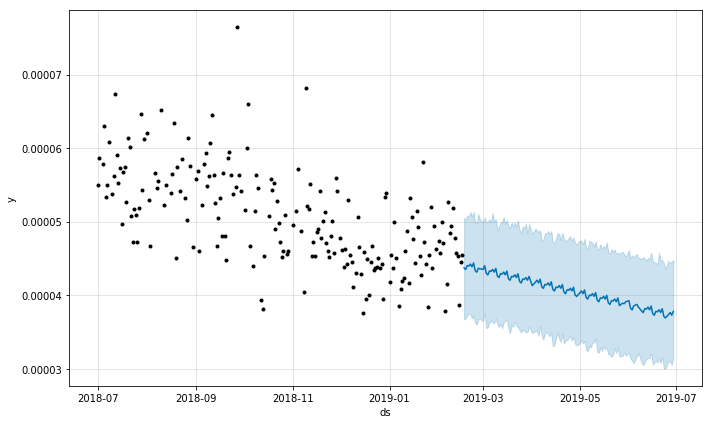

In [119]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('Aguirre_mean')
pro_regressor.add_regressor('Costa_Sur_mean')
pro_regressor.add_regressor('San_Juan_CC_mean')
pro_regressor.add_regressor('Palo_Seco_mean')
pro_regressor.add_regressor('EcoEléctrica_mean')
pro_regressor.add_regressor('A.E.S._Corp._mean')
pro_regressor.add_regressor('Cambalache_mean')
pro_regressor.add_regressor('Mayagüez_mean')
pro_regressor.add_regressor('Santa_Isabel_Wind_Farm_mean')
pro_regressor.add_regressor('Oriana_Solar_Farm_mean')
pro_regressor.add_regressor('Yabucoa_mean')
pro_regressor.add_regressor('Daguao_mean')
pro_regressor.add_regressor('Jobos_mean')
pro_regressor.add_regressor('Vega_Baja_mean')
pro_regressor.add_regressor('San_Fermin_Solar_Farm_mean')
pro_regressor.add_regressor('Loiza_Solar_Park_mean')
pro_regressor.add_regressor('Yauco_1_mean')
pro_regressor.add_regressor('AES_Ilumina_mean')
pro_regressor.add_regressor('Punta_Lima_mean')
pro_regressor.add_regressor('Salinas_mean')
pro_regressor.add_regressor('Dos_Bocas_mean')
pro_regressor.add_regressor('Carite_1_mean')
pro_regressor.add_regressor('Yauco_2_mean')
pro_regressor.add_regressor('Toro_Negro_1_mean')
pro_regressor.add_regressor('Garzas_1_mean')
pro_regressor.add_regressor('Vieques_EPP_mean')
pro_regressor.add_regressor('Garzas_2_mean')
pro_regressor.add_regressor('Río_Blanco_mean')
pro_regressor.add_regressor('Windmar_Ponce_mean')
pro_regressor.add_regressor('Caonillas_2_mean')
pro_regressor.add_regressor('Toro_Negro_2_mean')

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=30) # 30 days
#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

Predicted data is the blue shaded region at the end.

<div class="h2">Forecast quality evaluation for Power Plant over the year</div>
<a id="M2"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)

Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations yi and the corresponding predicted values y^i 


In [120]:
df_cv_reg = cross_validation(pro_regressor, horizon='30 days')
df_p_reg = performance_metrics(df_cv_reg)
df_p_reg.head(30)

horizon           mse      rmse       mae      mape  coverage
0   3 days  2.161236e-11  0.000005  0.000004  0.075808  0.827381
1   4 days  1.376332e-11  0.000004  0.000003  0.061661  0.934524
2   5 days  2.761296e-11  0.000005  0.000004  0.082191  0.863095
3   6 days  4.731257e-11  0.000007  0.000005  0.104801  0.809524
4   7 days  4.473132e-11  0.000007  0.000005  0.096290  0.821429
5   8 days  4.029928e-11  0.000006  0.000004  0.093065  0.869048
6   9 days  3.822546e-11  0.000006  0.000004  0.097607  0.904762
7  10 days  4.558375e-11  0.000007  0.000005  0.119827  0.827381
8  11 days  3.825643e-11  0.000006  0.000005  0.108667  0.815476
9  12 days  4.402271e-11  0.000007  0.000006  0.124000  0.702381
10 13 days  3.429258e-11  0.000006  0.000005  0.103562  0.726190
11 14 days  3.017714e-11  0.000005  0.000004  0.095316  0.738095
12 15 days  1.424385e-11  0.000004  0.000003  0.062621  0.857143
13 16 days  1.900857e-11  0.000004  0.000003  0.072284  0.817460
14 17 days  2.258510e-11  0.000005  0.000004  0.081139  0.821429
15 18 days  1.913789e-11  0.000004  0.000004  0.075025  0.880952
16 19 days  1.619209e-11  0.000004  0.000003  0.073493  0.952381
17 20 days  3.258990e-11  0.000006  0.000004  0.094263  0.857143
18 21 days  5.859156e-11  0.000008  0.000006  0.130513  0.714286
19 22 days  5.507069e-11  0.000007  0.000006  0.120910  0.702381
20 23 days  3.669984e-11  0.000006  0.000005  0.101866  0.845238
21 24 days  2.362647e-11  0.000005  0.000004  0.087807  0.870748
22 25 days  3.431947e-11  0.000006  0.000005  0.110687  0.761905
23 26 days  3.267393e-11  0.000006  0.000005  0.106813  0.785714
24 27 days  4.466280e-11  0.000007  0.000006  0.129761  0.666667
25 28 days  3.441942e-11  0.000006  0.000005  0.108967  0.791667
26 29 days  3.381868e-11  0.000006  0.000005  0.107595  0.761905
27 30 days  1.782146e-11  0.000004  0.000004  0.079248  0.952381

The RMSE for 30 days its 0.1.778483e-11.

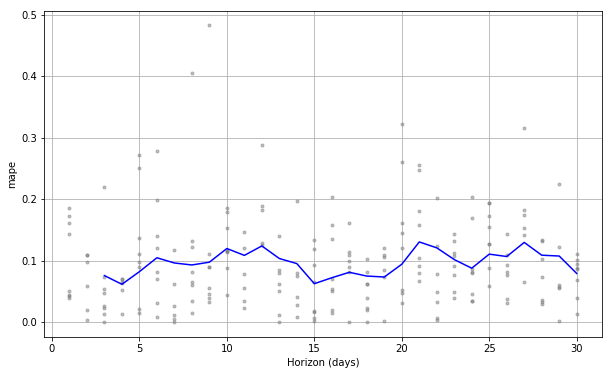

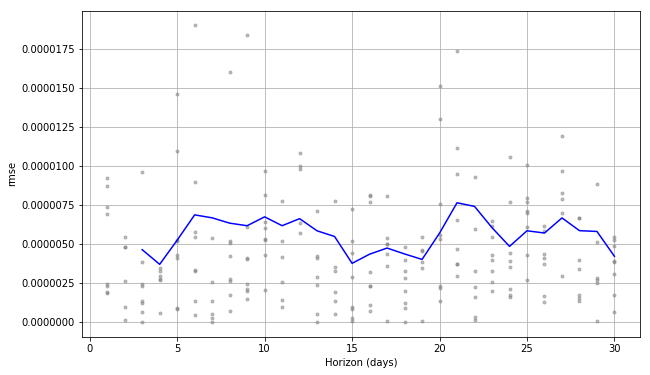

In [121]:
fig_mape_reg = plot_cross_validation_metric(df_cv_reg, metric='mape')
fig_mape_reg = plot_cross_validation_metric(df_cv_reg, metric='rmse')

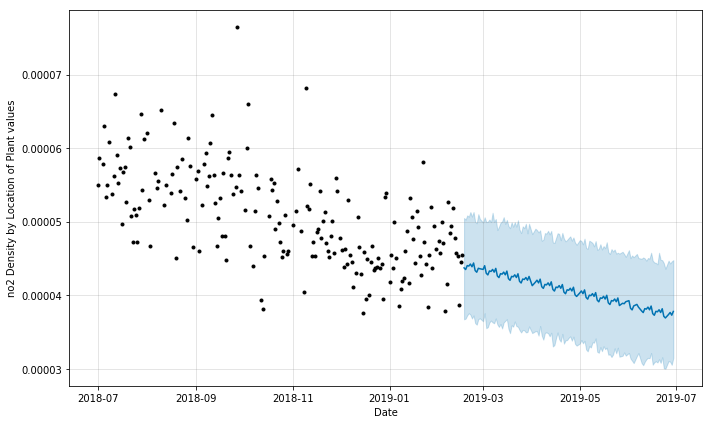

In [122]:
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py

fig_d_reg = plot_plotly(pro_regressor, forecast_data)

py.iplot(fig_d_reg) 

fig_d_reg = pro_regressor.plot(forecast_data,xlabel='Date',ylabel='no2 Density by Location of Plant values')

# Save The Model for primary_fuel

In [123]:
import pickle
with open('forecast_model_No2Density.pckl', 'wb') as fout:
    pickle.dump(pro_regressor, fout)
with open('forecast_model_No2Density.pckl', 'rb') as fin:
    m2 = pickle.load(fin)

### Another Example - Verification A.E.S.Corp 

In [124]:
power_plants_df[['name','primary_fuel','plant']][power_plants_df['primary_fuel']=='Coal']

name primary_fuel      plant
5  A.E.S. Corp.         Coal  A.E._Coal

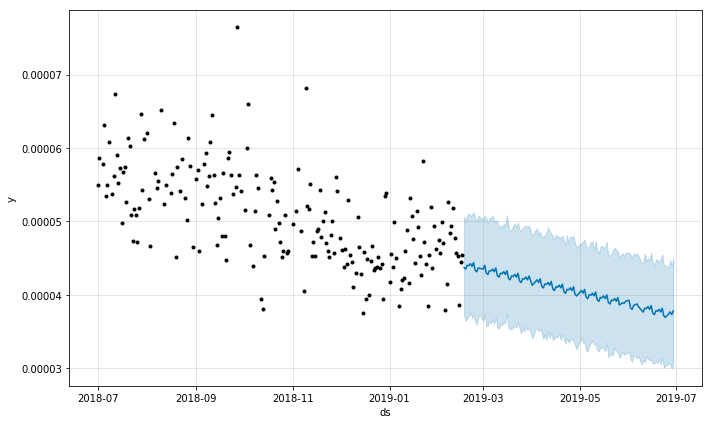

In [125]:
train_dataset['A.E.S._Corp._mean'] = X['A.E.S._Corp._mean']
# Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('A.E.S._Corp._mean')
train_X= train_dataset[:200]
test_X= train_dataset[200:]

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=30) # 30 days
#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

### Forecast quality evaluation for region
Let's evaluate the quality of the algorithm by calculating the error metrics for the last 30 days that we predicted. For this, we will need the observations yi and the corresponding predicted values y^i 


In [126]:
df_cv_reg = cross_validation(pro_regressor, horizon='30 days')
df_p_reg = performance_metrics(df_cv_reg)
df_p_reg.head(30)

horizon           mse      rmse       mae      mape  coverage
0   3 days  2.160353e-11  0.000005  0.000004  0.075858  0.827381
1   4 days  1.377150e-11  0.000004  0.000003  0.061727  0.934524
2   5 days  2.764772e-11  0.000005  0.000004  0.082352  0.863095
3   6 days  4.739575e-11  0.000007  0.000005  0.105068  0.809524
4   7 days  4.480194e-11  0.000007  0.000005  0.096541  0.821429
5   8 days  4.037172e-11  0.000006  0.000004  0.093294  0.869048
6   9 days  3.824119e-11  0.000006  0.000004  0.097627  0.904762
7  10 days  4.558755e-11  0.000007  0.000005  0.119819  0.827381
8  11 days  3.826836e-11  0.000006  0.000005  0.108691  0.815476
9  12 days  4.407365e-11  0.000007  0.000006  0.124137  0.702381
10 13 days  3.433642e-11  0.000006  0.000005  0.103748  0.773810
11 14 days  3.026272e-11  0.000006  0.000004  0.095559  0.785714
12 15 days  1.430567e-11  0.000004  0.000003  0.062870  0.952381
13 16 days  1.909972e-11  0.000004  0.000003  0.072494  0.817460
14 17 days  2.263812e-11  0.000005  0.000004  0.081296  0.809524
15 18 days  1.917472e-11  0.000004  0.000004  0.075168  0.845238
16 19 days  1.624015e-11  0.000004  0.000003  0.073673  0.952381
17 20 days  3.261753e-11  0.000006  0.000004  0.094464  0.857143
18 21 days  5.863817e-11  0.000008  0.000006  0.130759  0.714286
19 22 days  5.509834e-11  0.000007  0.000006  0.121094  0.702381
20 23 days  3.674879e-11  0.000006  0.000005  0.102019  0.797619
21 24 days  2.367645e-11  0.000005  0.000004  0.087942  0.823129
22 25 days  3.438399e-11  0.000006  0.000005  0.110841  0.684524
23 26 days  3.267341e-11  0.000006  0.000005  0.106843  0.738095
24 27 days  4.455497e-11  0.000007  0.000006  0.129633  0.571429
25 28 days  3.425536e-11  0.000006  0.000005  0.108740  0.690476
26 29 days  3.372383e-11  0.000006  0.000005  0.107501  0.666667
27 30 days  1.783120e-11  0.000004  0.000004  0.079315  0.904762

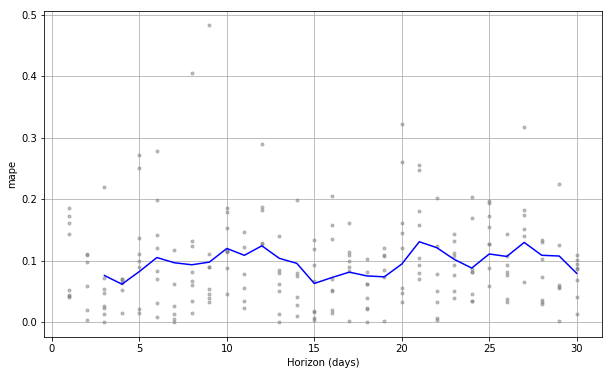

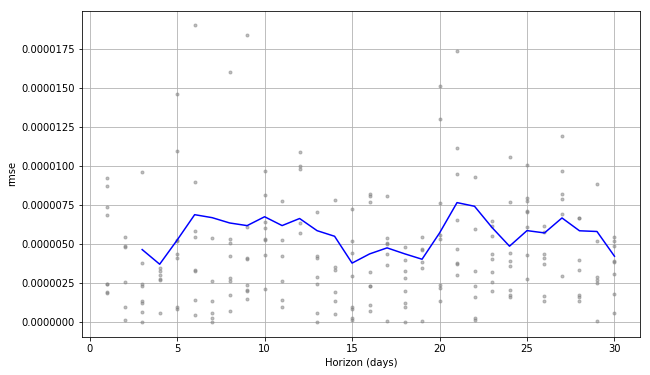

In [127]:
fig_mape_reg = plot_cross_validation_metric(df_cv_reg, metric='mape')
fig_mape_reg = plot_cross_validation_metric(df_cv_reg, metric='rmse')

<div class="h2">Outlier Analysis of Power Plant - Coal over the year</div>
<a id="M3"></a>
[Back to Table of Contents](#top)

[General Findinds](#theend)
   


Identifying outliers for A.E.S._Corp 

In [128]:
month_p_fuel = X[['start_date', 'no2_density_locationofplant', 'A.E.S._Corp._mean']].copy()
month_p_fuel['date'] = pd.to_datetime(X["start_date"])
month_p_fuel['date'] = month_p_fuel['date'].dt.month
month_p_fuel = month_p_fuel.groupby(['date','A.E.S._Corp._mean']).sum()
month_p_fuel


no2_density_locationofplant
date A.E.S._Corp._mean                             
1    0.000056                              0.001336
2    0.000056                              0.001290
3    0.000056                              0.001620
4    0.000056                              0.001665
5    0.000056                              0.001552
6    0.000056                              0.001593
7    0.000056                              0.001571
8    0.000056                              0.001159
9    0.000056                              0.001491
10   0.000056                              0.001202
11   0.000056                              0.001305
12   0.000056                              0.001305

In [129]:
month_p_fuel_agg = month_p_fuel.groupby(['date', 'A.E.S._Corp._mean']).agg(['sum'])
month_p_fuel_agg = month_p_fuel_agg.reset_index()
level_0 = month_p_fuel_agg.columns.droplevel(0)
level_1 = month_p_fuel_agg.columns.droplevel(1)
level_0 = ['' if x == '' else '-' + x for x in level_0]

month_p_fuel_agg.columns = level_1 + level_0
month_p_fuel_agg.rename_axis(None, axis=1)
# month_p_fuel_agg.head()

date  A.E.S._Corp._mean  no2_density_locationofplant-sum
0      1           0.000056                         0.001336
1      2           0.000056                         0.001290
2      3           0.000056                         0.001620
3      4           0.000056                         0.001665
4      5           0.000056                         0.001552
5      6           0.000056                         0.001593
6      7           0.000056                         0.001571
7      8           0.000056                         0.001159
8      9           0.000056                         0.001491
9     10           0.000056                         0.001202
10    11           0.000056                         0.001305
11    12           0.000056                         0.001305

In [130]:
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

fig_total = px.line(month_p_fuel_agg, x='date', y='no2_density_locationofplant-sum', color='A.E.S._Corp._mean', render_mode='svg')
fig_total.update_layout(title='Total NO2 aspect in A.E.S._Corp._mean - 12 months')
fig_total.show()

The sum, facetted for A.E.S._Corp._mean aspect, shows some aberrant values, for example in month 4, April. August have the least N02 value. 

### Outlier Analysis of Power Plant - Coal day of week

In [131]:
dayweek_p_fuel = X[['start_date', 'no2_density_locationofplant', 'A.E.S._Corp._mean']].copy()
dayweek_p_fuel['dateofweek'] = pd.to_datetime(X["start_date"])
dayweek_p_fuel['dateofweek'] = dayweek_p_fuel['dateofweek'].dt.dayofweek
dayweek_p_fuel = dayweek_p_fuel.groupby(['dateofweek','A.E.S._Corp._mean']).sum()

dayofweek_p_fuel_agg = dayweek_p_fuel.groupby(['dateofweek', 'A.E.S._Corp._mean']).agg(['sum'])
dayofweek_p_fuel_agg = dayofweek_p_fuel_agg.reset_index()
level_0 = dayofweek_p_fuel_agg.columns.droplevel(0)
level_1 = dayofweek_p_fuel_agg.columns.droplevel(1)
level_0 = ['' if x == '' else '-' + x for x in level_0]

dayofweek_p_fuel_agg.columns = level_1 + level_0
dayofweek_p_fuel_agg.rename_axis(None, axis=1)

dateofweek  A.E.S._Corp._mean  no2_density_locationofplant-sum
0           0           0.000056                         0.002375
1           1           0.000056                         0.002126
2           2           0.000056                         0.002499
3           3           0.000056                         0.002561
4           4           0.000056                         0.002492
5           5           0.000056                         0.002527
6           6           0.000056                         0.002510

### Outlier Analysys - day of the week with Monday=0, Sunday=6

In [132]:
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

fig_total = px.line(dayofweek_p_fuel_agg, x='dateofweek', y='no2_density_locationofplant-sum', color='A.E.S._Corp._mean', render_mode='svg')
fig_total.update_layout(title='Total NO2 aspect in A.E.S._Corp._mean - day of week')
fig_total.show()

The sum, faceted for A.E.S.Corp._ mean aspect shows some aberrant values. For example, in general, Thursday (3) has the bigger aberrant value. Tuesday (1) has the least N02 value.

## Our modeling investigate regions, primary_fuel model  and we can decompose emission factors between plants,over time and identifying anomaly events.

   <hr>
Inspired by: [Exploratory Data Analysis and Factor Model](https://www.kaggle.com/ragnar123/exploratory-data-analysis-and-factor-model-idea),
[Modelling of emissions of power plants](https://www.kaggle.com/tiurii/ds4g-modelling-of-emissions-of-power-plants)

source: [Survey](https://www.tandfonline.com/doi/full/10.1080/10962247.2019.1577314?scroll=top&needAccess=true),[Arima python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/), [anomaly detection](https://github.com/Vicam/Unsupervised_Anomaly_Detection/blob/master/Anomaly%20detection%2C%20different%20methods%20on%20a%20simple%20example.ipynb), [Intro LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/),[LSTM](https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm), [prophet facebook](https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236), [forecast in python](https://towardsdatascience.com/forecasting-in-python-with-facebook-prophet-29810eb57e66)

   <hr>
<a id='ds5'></a>
# <div class="h2">About the data</div>
<a id="ABOUTTHEDATA"></a>

[Back to Table of Contents](#top)

[General Findinds](#theend)
<hr>

[Global Power Plant database ](https://developers.google.com/earth-engine/datasets/catalog/WRI_GPPD_power_plants) by WRI
> Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 30,000 power plants from 164 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

[Sentinel 5P OFFL NO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2) by [EU/ESA/Copernicus](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-5p-tropomi/document-library)
> Sentinel-5 Precursor
Sentinel-5 Precursor is a satellite launched on 13 October 2017 by the European Space Agency to monitor air pollution. The onboard sensor is frequently referred to as Tropomi (TROPOspheric Monitoring Instrument). The OFFL/NO2 is a dataset that provides offline high-resolution imagery of **NO2 concentration**.

[Global Forecast System 384-Hour Predicted Atmosphere Data](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25) by NOAA/NCEP/EMC
> The Global Forecast System (GFS) is a weather forecast model produced by the National Centers for Environmental Prediction (NCEP). The GFS dataset consists of selected model outputs (described below) as gridded forecast variables. The 384-hour forecasts, with 3-hour forecast interval, are made at 6-hour temporal resolution (i.e. updated four times daily). Use the 'creation_time' and 'forecast_time' properties to select data of interest.

[Global Land Data Assimilation System](https://developers.google.com/earth-engine/datasets/catalog/NASA_GLDAS_V021_NOAH_G025_T3H) by NASA
> Global Land Data Assimilation System (GLDAS) ingests satellite and ground-based observational data products. Using advanced land surface modeling and data assimilation techniques, it generates optimal fields of land surface states and fluxes. his dataset provided by NASA ingest satellite.

Participants may also consider using other public datasets related to trade commodities for fuel types, total fuel consumed, and/or data from the [US Energy Information Agency (EIA)](https://www.eia.gov/state/data.php?sid=RQ#CarbonDioxideEmissions).

<hr>
<a id='ds5'></a>
# <div class="h2">Don't hesitate to give your suggestions in the comment section.</div>
<a id="theend"></a>
<a id='ds5'></a>
# <div class="h3">Remember the upvote button is next to the fork button, and it's free too! ;)</div>
<a id="theend"></a>

# Ending note